In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN,SVMSMOTE,BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix
# Newly added SMOTE version.......................... 11/09/2022........................

from imblearn.over_sampling import KMeansSMOTE
import tensorflow as tf
from sklearn.metrics import f1_score
from statistics import stdev
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader

import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
urlist=['https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/page-blocks-1-3_vs_4.dat','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/ecoli4.dat','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/poker-8_vs_6.dat','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/winequality-red-8_vs_6.dat','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/yeast-2_vs_4.dat','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/abalone_csv.csv',
       'https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/ionosphere_data_kaggle.csv','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/realspambase%20(1).data',['https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/SHUTTLE/shuttle%20(1).trn','https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/SHUTTLE/shuttle%20(1).tst']]
option=int(input("Enter 0 for page-blocks\nEnter 1 for ecoli\nEnter 2 for poker\nEnter 3 for winequality\nEnter 4 for yeast\nEnter 5 for abalone\nEnter 6 for ionosphere\nEnter 7 for spambase\nEnter 8 for shuttle\n"))

Enter 0 for page-blocks
Enter 1 for ecoli
Enter 2 for poker
Enter 3 for winequality
Enter 4 for yeast
Enter 5 for abalone
Enter 6 for ionosphere
Enter 7 for spambase
Enter 8 for shuttle
3


In [ ]:
#df=pd.read_csv("https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/abalone_csv.csv")

In [ ]:
# df.head()

In [ ]:
# df.shape

In [ ]:
if option!=8:
    import pandas as pd
    url=urlist[option]
    data = pd.read_csv(url, sep=",", header='infer' )
if option==5:
    category = np.repeat("empty000", data.shape[0])
    for i in range(0, data["Class_number_of_rings"].size):
        if(data["Class_number_of_rings"][i] <= 7):
            category[i] = int(1)
        elif(data["Class_number_of_rings"][i] > 7):
            category[i] = int(0)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data['Sex'])
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    data = data.drop(['Sex'], axis=1)
    data['category_size'] = category
    data = data.drop(['Class_number_of_rings'], axis=1)
    features = data.iloc[:,np.r_[0:7]]
    labels = data.iloc[:,7]
    X_train1, X_test1, y_train1, y_test1, X_gender, X_gender_test = train_test_split(features, labels, onehot_encoded, random_state=10, test_size=0.3)
    temp = X_train1.values
    X_train1 = np.concatenate((temp, X_gender), axis=1)
    temp2 = X_test1.values
    X_test1 = np.concatenate((temp2, X_gender_test), axis=1)
    test_list = [int(i) for i in y_test1.ravel()] 
    y_test1=np.array(test_list)
    train_list = [int(i) for i in y_train1.ravel()] 
    y_train1=np.array(train_list)
    ep=30
    ne=150
elif option==7:
    dict_1={}
    dict_1=dict(data.corr()['1'])
    list_features=[]
    for key,values in dict_1.items():
        if abs(values)<0.2:
            list_features.append(key)
    data=data.drop(list_features,axis=1)  
    X = data.values[:,0:19].astype(float)
    Y = data.values[:,19]
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    X_train1,X_test1,y_train1,y_test1=train_test_split(X,Y,random_state=0,test_size=0.2)
    ep=90
    ne=1500
elif option==8:
    url1=urlist[option][0]
    url2=urlist[option][1]
    dtrn = pd.read_csv(url1, sep=",", header='infer' )
    dtes = pd.read_csv(url2, sep=",", header='infer' )
    dtr=dtrn.to_numpy()
    dte=dtes.to_numpy()
    ln=[]
    yn=[]
    for i in range(43499):
        l=list(map(int,dtr[i][0].split()))
        ln.append(l[:9])
        yn.append(l[9])
    lnn=[]
    ynn=[]
    for i in range(14499):
        l=list(map(int,dte[i][0].split()))
        lnn.append(l[:9])
        ynn.append(l[9])    
    X_train1 = np.asarray(ln, dtype=np.float32)
    X_test1 = np.asarray(lnn, dtype=np.float32) 
    yk=[]
    for i in yn:
        if i==3:
            yk.append(1)
        else:
            yk.append(0)
    ykk=[]
    for i in ynn:
        if i==3:
            ykk.append(1)
        else:
            ykk.append(0)  
    y_train1=np.array(yk)
    y_test1=np.array(ykk)  
    ep=10
    ne=1000
else:
    t=()
    t=data.shape
    X = data.values[:,0:(t[1]-1)].astype(float)
    Y = data.values[:,(t[1]-1)]
    
    if option==0 or option==3 or option==2 :
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    
    from sklearn.preprocessing import LabelEncoder
    from keras.utils import np_utils
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    dummy_y = np_utils.to_categorical(encoded_Y)
    if option==1:
        yk=[]
        for i in encoded_Y:
            if i==2:
                yk.append(1)
            else:
                yk.append(0)
        encoded_Y = np.asarray(yk, dtype=np.float32)
        encoded_Y.shape 
    if option==0:
        rs=1
        ep=10
        ne=2000
    if option==1:
        rs=0
        ep=10
        ne=700
    if option==2:
        rs=1
        ep=30
        ne=1500
    if option==3:
        rs=4
        ep=30
        ne=1500    
    if option==4:
        rs=1
        ep=10
        ne=1000  
    if option==6:
        rs=11
        ep=100
        ne=200
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X,encoded_Y, test_size=0.2, random_state=rs)
if option!=6:
    print("Before OverSampling, counts of label '1': {}".format(sum(y_train1==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1==0)))

Before OverSampling, counts of label '1': 12
Before OverSampling, counts of label '0': 512 



In [ ]:
#X_train1,X_test1, Y_train1, Y_test1=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train1.shape

(524, 11)

In [ ]:
#X_test1.shape

In [ ]:
#  data = pd.read_csv(url)

In [ ]:
# data['Sex'].replace(['M', 'F', 'I'],
#                         [0, 1,2], inplace=True)

In [ ]:
# data

In [ ]:
# X = data.iloc[:,0:8]
# Y = data.iloc[:,8]

In [ ]:
# df = df.values

In [ ]:
# X = df[:,0:7].astype(float)
# Y = df[:,7]

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
# if option!=8:
#     import pandas as pd
#     url=urlist[option]
#     data = pd.read_csv(url, sep=",", header='infer' )
# t=()
# t=data.shape
# X = data.values[:,0:(t[1]-1)].astype(float)
# Y = data.values[:,(t[1]-1)]
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils
# # binary classification for labelbinarizer
# #encoder = LabelBinarizer()
# #encoded_Y=encoder.fit_transform(Y)
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
# dummy_y.shape 

In [ ]:
# X.shape

In [ ]:
# dummy_y[0]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1,y_train1, test_size=0.2, random_state=42)

Without Oversampling & Neural Network

In [ ]:
# #without sampling
# #commenting for abalone dataset
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X,encoded_Y, test_size=0.2, random_state=42)

In [ ]:
# data without oversampling techniques.............................
model1 = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
model1.compile(optimizer='adam',
                  loss='mean_absolute_error',
                  metrics=['accuracy'])

Epoch 1/30
14/14 [==============================] - 4s 5ms/step - loss: 0.0626 - accuracy: 0.9737
Epoch 2/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9737
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9737
Epoch 4/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9737
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9737
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9737
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9737
Epoch 8/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9737
Epoch 9/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9737
Epoch 10/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9737
Epoch 11/30
14/14 [

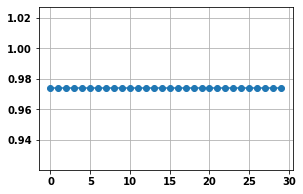

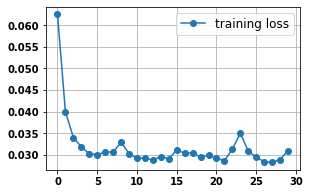

In [ ]:
# data without oversampling techniques.............................
model1 = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
model1.compile(optimizer='adam',
                  loss='mean_absolute_error',
                  metrics=['accuracy'])
import time
t1=time.process_time()
history1= model1.fit(X_train1,y_train1.ravel(), epochs=30)
t2 =time.process_time()
print("process time of NN:", t2-t1)  
fig = plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(history1.history['accuracy'], label= 'training accuracy', marker='o')
#plt.plot(history1.history['val_accuracy'], label= 'val accuracy', marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
fig = plt.figure(figsize = (10, 3))
plt.subplot(122)
#plt.xlabel("number of epoch")
#plt.ylabel("loss")
plt.plot(history1.history['loss'], label = 'training loss',marker='o')
#plt.plot(history1.history['val_loss'], label = 'val loss',marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
plt.legend(prop={'size':12})

In [ ]:
!pip install keras-flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Calculae FLOPS
from keras_flops import get_flops
flops = get_flops(model1, batch_size=1)
print("flops",flops)

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


flops 71809


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               3072      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,097
Trainable params: 36,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
yprr1=model1.predict(X_test1)
ypr1=(yprr1>0.5)*1
ypre= np.ravel(yprr1)
print(classification_report(y_test1.ravel(),ypr1))
test_loss1, test_acc1 = model1.evaluate(X_test1, y_test1.ravel(), verbose=2)
print('\nTest accuracy:', test_acc1)
tr_loss1, tr_acc1 = model1.evaluate(X_train1,y_train1.ravel(), verbose=2)
print('\nTrain accuracy:', tr_acc1)
print("confusion matrix", confusion_matrix(y_test1.ravel(),ypr1))

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       0.00      0.00      0.00         1

    accuracy                           0.99       105
   macro avg       0.50      0.50      0.50       105
weighted avg       0.98      0.99      0.99       105



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 - 0s - loss: 0.0128 - accuracy: 0.9905 - 286ms/epoch - 71ms/step

Test accuracy: 0.9904761910438538
14/14 - 0s - loss: 0.0290 - accuracy: 0.9737 - 39ms/epoch - 3ms/step

Train accuracy: 0.9737470149993896
confusion matrix [[104   0]
 [  1   0]]


Oversampling & Neural Network

In [ ]:
#import smote_variants as sv
#sm=SMOTE()
#for ecoli k_neighbors=1, we need to do it
#sm = SVMSMOTE(random_state=2,k_neighbors=1,sampling_strategy='minority')
#sm = SVMSMOTE()
#sm=sv.distance_SMOTE()
sm = BorderlineSMOTE()
# X_res2, y_res2 = sm.fit_resample(X,encoded_Y)
#for abalone dataset
X_res2, y_res2 = sm.fit_resample(X_train1, y_train1.ravel())

In [ ]:
# encoded_Y.shape

# Save the dataset

In [ ]:
df_smote= np.concatenate((X_res2, np.vstack(y_res2)), axis = 1)
df_smote= pd.DataFrame(df_smote)

In [ ]:
#df_smote.to_csv('/content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/Oversample_data/SMOTE_5.csv')

In [ ]:
df_smote.to_csv('/content/drive/MyDrive/Ahsan/2023/Borderline_SMOTE/SMOTE.csv')

In [ ]:
df_smote.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.346883,0.356637,0.369311,0.093685,0.103724,0.196116,0.212387,0.397963,0.409507,0.194650,0.525374,0.500000
std,0.200706,0.170817,0.236735,0.076393,0.081122,0.119479,0.153911,0.170636,0.149043,0.074889,0.229634,0.500307
min,0.000000,0.000000,0.000000,0.020690,0.010499,0.000000,0.000000,0.009545,0.000000,0.000000,0.000000,0.000000
25%,0.208333,0.228242,0.153846,0.064500,0.067685,0.098592,0.090341,0.291984,0.298060,0.154839,0.363714,0.000000
50%,0.312500,0.303470,0.378792,0.077489,0.094488,0.183099,0.157233,0.406021,0.392558,0.192925,0.500000,0.500000
75%,0.475900,0.465786,0.561814,0.103448,0.118110,0.253521,0.304534,0.518489,0.507923,0.234733,0.642857,1.000000
max,1.000000,0.977273,1.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res2, y_res2, test_size=0.2, random_state=42)

Epoch 1/30
21/21 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7469
Epoch 2/30
21/21 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8267
Epoch 3/30
21/21 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.8466
Epoch 4/30
21/21 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.8574
Epoch 5/30
21/21 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.8681
Epoch 6/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.8742
Epoch 7/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.8880
Epoch 8/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.8942
Epoch 9/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.8988
Epoch 10/30
21/21 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9049
Epoch 11/30
21/21 [

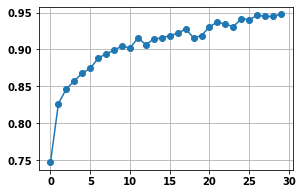

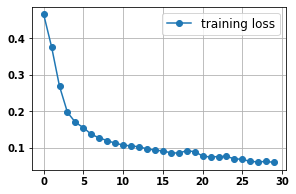

In [ ]:

model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model2.compile(optimizer='adam',
                  loss='mean_absolute_error',
                  metrics=['accuracy'])
import time
t1=time.process_time()
history2= model2.fit(X_train2,y_train2.ravel(), epochs=30)
t2 =time.process_time()
print("process time:", t2-t1)  
fig = plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(history2.history['accuracy'], label= 'training accuracy', marker='o')
#plt.plot(history2.history['val_accuracy'], label= 'val accuracy', marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
fig = plt.figure(figsize = (10, 3))
plt.subplot(122)
#plt.xlabel("number of epoch")
#plt.ylabel("loss")
plt.plot(history2.history['loss'], label = 'training loss',marker='o')
#plt.plot(history2.history['val_loss'], label = 'val loss',marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
plt.legend(prop={'size':12})

In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test1, y_test1.ravel(), verbose=2)
print('\nTest accuracy:', test_acc2)
tr_loss2, tr_acc2 = model2.evaluate(X_train2,y_train2.ravel(), verbose=2)
print('\nTrain accuracy:', tr_acc2)

4/4 - 0s - loss: 0.1135 - accuracy: 0.8857 - 431ms/epoch - 108ms/step

Test accuracy: 0.8857142925262451
21/21 - 0s - loss: 0.0572 - accuracy: 0.9479 - 277ms/epoch - 13ms/step

Train accuracy: 0.9478527903556824


In [ ]:
yprr2=model2.predict(X_test1)
ypr2=(yprr2>0.5)*1
ypre2= np.ravel(yprr2)
print(classification_report(y_test1.ravel(),ypr2))

4/4 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       104
           1       0.08      1.00      0.14         1

    accuracy                           0.89       105
   macro avg       0.54      0.94      0.54       105
weighted avg       0.99      0.89      0.93       105



In [ ]:
print("confusion matrix", confusion_matrix(y_test1.ravel(),ypr2))

confusion matrix [[92 12]
 [ 0  1]]


GAN & NeuralNetwork

In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_res2, y_res2, test_size=0.2, random_state=42)

In [ ]:
t2=X_train3.shape
X_oversampled=X_res2[(t2[0]):]


In [ ]:
torch.cuda.empty_cache()
def get_generator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LayerNorm(output_dim),
        #nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True),
    )
class Generator(nn.Module):

    def __init__(self, z_dim=t2[1], im_dim=t2[1], hidden_dim=128):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            nn.Linear(hidden_dim * 8, im_dim),
            #newly added..........................
            nn.Sigmoid()
        )
    def forward(self, noise):
        return self.gen(noise)
    
   
    def get_gen(self):

        return self.gen
def get_discriminator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        #newly added.................
        nn.LayerNorm(output_dim),
        nn.LeakyReLU(0.2, inplace=True)        
    )
class Discriminator(nn.Module):
    def __init__(self, im_dim=t2[1], hidden_dim=128):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            get_discriminator_block(im_dim, hidden_dim * 4),
            get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
            get_discriminator_block(hidden_dim * 2, hidden_dim),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, image):

        return self.disc(image)
    
    def get_disc(self):

        return self.dis

def get_disc_loss(gen, disc, criterion, real, device):

    fake = gen(X_oversampled.float().to(device))
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2
    return disc_loss

def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    fake_images = gen(X_oversampled.float().to(device))
    
    disc_fake_pred = disc(fake_images)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

def get_noise(n_samples, z_dim, device='cuda'):

    return torch.randn(n_samples,z_dim,device=device) 

In [ ]:
import time
t1=time.process_time()
disc_plt = {}
gen_plt = {}


X_oversampled = torch.from_numpy(X_oversampled)
criterion = nn.BCEWithLogitsLoss()
#n_epochs=ne
n_epochs = 50
z_dim = t2[1]
batch_size = 32
lr = 0.00001
display_step = 1
device = 'cuda'
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)


y_tr=y_train3.ravel()
li=[]
for i in range(len(y_tr)):
    if int(y_tr[i])==1:
        li.append(X_train3[i])
X_real=np.array(li)
t3=X_real.shape
li2=[1]*(t3[0])
y_real=np.array(li2)
y_real.shape

tensor_x = torch.Tensor(X_real) 
tensor_y = torch.Tensor(y_real)
my_dataset = TensorDataset(tensor_x,tensor_y) 
dataloader = DataLoader(
    my_dataset,
    batch_size=batch_size,
    shuffle=True)
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True 
gen_loss = False
error = False
for epoch in range(n_epochs):
  
    
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

      
        real = real.view(cur_batch_size, -1).to(device)

  
       
        disc_opt.zero_grad()

      
        disc_loss = get_disc_loss(gen, disc, criterion, real, device)

        
        disc_loss.backward(retain_graph=True)

       
        disc_opt.step()

    
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()        

        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.02 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

    
        mean_discriminator_loss += disc_loss.item() / display_step
        mean_generator_loss += gen_loss.item() / display_step

    
        if cur_step % display_step == 0 and cur_step > 0:
            gen_plt[epoch] = mean_generator_loss
            disc_plt[epoch] = mean_discriminator_loss
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1
t2 =time.process_time()
print("process time:", t2-t1)  

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 0, step 1: Generator loss: 1.5021159052848816, discriminator loss: 1.526000201702118
Epoch 0, step 2: Generator loss: 0.7494474649429321, discriminator loss: 0.7582909464836121
Epoch 0, step 3: Generator loss: 0.7485442757606506, discriminator loss: 0.7470507621765137
Epoch 0, step 4: Generator loss: 0.7481043338775635, discriminator loss: 0.744002103805542
Epoch 0, step 5: Generator loss: 0.7482460737228394, discriminator loss: 0.740729033946991
Epoch 0, step 6: Generator loss: 0.748776376247406, discriminator loss: 0.7354141473770142
Epoch 0, step 7: Generator loss: 0.7494525909423828, discriminator loss: 0.7219810485839844
Epoch 0, step 8: Generator loss: 0.75045245885849, discriminator loss: 0.7232061624526978
Epoch 0, step 9: Generator loss: 0.7518918514251709, discriminator loss: 0.7170876264572144
Epoch 0, step 10: Generator loss: 0.7539497017860413, discriminator loss: 0.7030043601989746


  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 1, step 11: Generator loss: 0.7561724185943604, discriminator loss: 0.705251932144165
Epoch 1, step 12: Generator loss: 0.7585108280181885, discriminator loss: 0.6952210664749146
Epoch 1, step 13: Generator loss: 0.7606136202812195, discriminator loss: 0.6959853172302246
Epoch 1, step 14: Generator loss: 0.7626146078109741, discriminator loss: 0.6915474534034729
Epoch 1, step 15: Generator loss: 0.7648255825042725, discriminator loss: 0.6810704469680786
Epoch 1, step 16: Generator loss: 0.7670180797576904, discriminator loss: 0.6758593320846558
Epoch 1, step 17: Generator loss: 0.7689958810806274, discriminator loss: 0.6707285642623901
Epoch 1, step 18: Generator loss: 0.7705346941947937, discriminator loss: 0.6668505668640137
Epoch 1, step 19: Generator loss: 0.7720335721969604, discriminator loss: 0.6661539077758789
Epoch 1, step 20: Generator loss: 0.7735069990158081, discriminator loss: 0.657326340675354
Epoch 1, step 21: Generator loss: 0.7748891711235046, discriminator loss

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 2, step 22: Generator loss: 0.7762678861618042, discriminator loss: 0.6518741846084595
Epoch 2, step 23: Generator loss: 0.7777402997016907, discriminator loss: 0.6504088640213013
Epoch 2, step 24: Generator loss: 0.7793444991111755, discriminator loss: 0.6431770324707031
Epoch 2, step 25: Generator loss: 0.7812220454216003, discriminator loss: 0.6388383507728577
Epoch 2, step 26: Generator loss: 0.7835285663604736, discriminator loss: 0.631659746170044
Epoch 2, step 27: Generator loss: 0.7858487963676453, discriminator loss: 0.6319220066070557
Epoch 2, step 28: Generator loss: 0.788017988204956, discriminator loss: 0.624622642993927
Epoch 2, step 29: Generator loss: 0.7901808023452759, discriminator loss: 0.6240078210830688
Epoch 2, step 30: Generator loss: 0.7924476861953735, discriminator loss: 0.617763102054596
Epoch 2, step 31: Generator loss: 0.7948426008224487, discriminator loss: 0.6123337745666504
Epoch 2, step 32: Generator loss: 0.7974212169647217, discriminator loss: 

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 3, step 33: Generator loss: 0.8001036643981934, discriminator loss: 0.6103428602218628
Epoch 3, step 34: Generator loss: 0.8029513359069824, discriminator loss: 0.6005316972732544
Epoch 3, step 35: Generator loss: 0.8054345846176147, discriminator loss: 0.6041026711463928
Epoch 3, step 36: Generator loss: 0.8080286979675293, discriminator loss: 0.5940995216369629
Epoch 3, step 37: Generator loss: 0.8105847239494324, discriminator loss: 0.5980929732322693
Epoch 3, step 38: Generator loss: 0.8130770325660706, discriminator loss: 0.5939511060714722
Epoch 3, step 39: Generator loss: 0.8158702254295349, discriminator loss: 0.5828847885131836
Epoch 3, step 40: Generator loss: 0.8189700841903687, discriminator loss: 0.584976077079773
Epoch 3, step 41: Generator loss: 0.8219184279441833, discriminator loss: 0.5855032205581665
Epoch 3, step 42: Generator loss: 0.8246908187866211, discriminator loss: 0.5774034261703491
Epoch 3, step 43: Generator loss: 0.8278515338897705, discriminator los

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 4, step 44: Generator loss: 0.8306833505630493, discriminator loss: 0.5736690759658813
Epoch 4, step 45: Generator loss: 0.833345353603363, discriminator loss: 0.5704976916313171
Epoch 4, step 46: Generator loss: 0.8359605669975281, discriminator loss: 0.564262866973877
Epoch 4, step 47: Generator loss: 0.8380749821662903, discriminator loss: 0.5639220476150513
Epoch 4, step 48: Generator loss: 0.8395305275917053, discriminator loss: 0.5610355734825134
Epoch 4, step 49: Generator loss: 0.8405052423477173, discriminator loss: 0.5624589323997498
Epoch 4, step 50: Generator loss: 0.8408394455909729, discriminator loss: 0.5638344883918762
Epoch 4, step 51: Generator loss: 0.8409873843193054, discriminator loss: 0.5570420026779175
Epoch 4, step 52: Generator loss: 0.8408915400505066, discriminator loss: 0.5554986596107483
Epoch 4, step 53: Generator loss: 0.8404584527015686, discriminator loss: 0.5654398202896118
Epoch 4, step 54: Generator loss: 0.840045154094696, discriminator loss:

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 5, step 55: Generator loss: 0.8398375511169434, discriminator loss: 0.5551670789718628
Epoch 5, step 56: Generator loss: 0.839418888092041, discriminator loss: 0.5511200428009033
Epoch 5, step 57: Generator loss: 0.8387612700462341, discriminator loss: 0.5548243522644043
Epoch 5, step 58: Generator loss: 0.8377558588981628, discriminator loss: 0.5587339401245117
Epoch 5, step 59: Generator loss: 0.8365940451622009, discriminator loss: 0.5489469170570374
Epoch 5, step 60: Generator loss: 0.8353902101516724, discriminator loss: 0.5553296804428101
Epoch 5, step 61: Generator loss: 0.8339080214500427, discriminator loss: 0.5531123876571655
Epoch 5, step 62: Generator loss: 0.8320961594581604, discriminator loss: 0.5529687404632568
Epoch 5, step 63: Generator loss: 0.8300297260284424, discriminator loss: 0.5489306449890137
Epoch 5, step 64: Generator loss: 0.8272556066513062, discriminator loss: 0.5634967684745789
Epoch 5, step 65: Generator loss: 0.8229807019233704, discriminator los

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 6, step 66: Generator loss: 0.8179406523704529, discriminator loss: 0.5579036474227905
Epoch 6, step 67: Generator loss: 0.811534583568573, discriminator loss: 0.5643529891967773
Epoch 6, step 68: Generator loss: 0.8043901324272156, discriminator loss: 0.563723623752594
Epoch 6, step 69: Generator loss: 0.7967697381973267, discriminator loss: 0.5672742128372192
Epoch 6, step 70: Generator loss: 0.7891048192977905, discriminator loss: 0.5717554688453674
Epoch 6, step 71: Generator loss: 0.7813898921012878, discriminator loss: 0.5803583860397339
Epoch 6, step 72: Generator loss: 0.7736609578132629, discriminator loss: 0.5839902758598328
Epoch 6, step 73: Generator loss: 0.7663887739181519, discriminator loss: 0.592003345489502
Epoch 6, step 74: Generator loss: 0.7601335048675537, discriminator loss: 0.5998210906982422
Epoch 6, step 75: Generator loss: 0.7544121146202087, discriminator loss: 0.603848397731781
Epoch 6, step 76: Generator loss: 0.7497862577438354, discriminator loss: 

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 7, step 77: Generator loss: 0.7462378144264221, discriminator loss: 0.6044647693634033
Epoch 7, step 78: Generator loss: 0.7437523603439331, discriminator loss: 0.6052985191345215
Epoch 7, step 79: Generator loss: 0.7422957420349121, discriminator loss: 0.6150075197219849
Epoch 7, step 80: Generator loss: 0.7413631677627563, discriminator loss: 0.6257224082946777
Epoch 7, step 81: Generator loss: 0.7408603429794312, discriminator loss: 0.6261881589889526
Epoch 7, step 82: Generator loss: 0.7406919002532959, discriminator loss: 0.6266154646873474
Epoch 7, step 83: Generator loss: 0.7410932183265686, discriminator loss: 0.6224199533462524
Epoch 7, step 84: Generator loss: 0.7424739599227905, discriminator loss: 0.6180734634399414
Epoch 7, step 85: Generator loss: 0.743771493434906, discriminator loss: 0.6377798318862915
Epoch 7, step 86: Generator loss: 0.7451959848403931, discriminator loss: 0.6286568641662598
Epoch 7, step 87: Generator loss: 0.7469210028648376, discriminator los

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 8, step 88: Generator loss: 0.7485830783843994, discriminator loss: 0.6386336088180542
Epoch 8, step 89: Generator loss: 0.7501964569091797, discriminator loss: 0.6337160468101501
Epoch 8, step 90: Generator loss: 0.7518577575683594, discriminator loss: 0.6347277164459229
Epoch 8, step 91: Generator loss: 0.753817081451416, discriminator loss: 0.6261887550354004
Epoch 8, step 92: Generator loss: 0.7556933760643005, discriminator loss: 0.6309278011322021
Epoch 8, step 93: Generator loss: 0.7575380802154541, discriminator loss: 0.6300439238548279
Epoch 8, step 94: Generator loss: 0.7590985894203186, discriminator loss: 0.6378095149993896
Epoch 8, step 95: Generator loss: 0.760527491569519, discriminator loss: 0.6350821852684021
Epoch 8, step 96: Generator loss: 0.7619639039039612, discriminator loss: 0.6317604184150696
Epoch 8, step 97: Generator loss: 0.7632198333740234, discriminator loss: 0.6395460367202759
Epoch 8, step 98: Generator loss: 0.7631942629814148, discriminator loss

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 9, step 99: Generator loss: 0.762624204158783, discriminator loss: 0.6502389907836914
Epoch 9, step 100: Generator loss: 0.7617092132568359, discriminator loss: 0.6443217396736145
Epoch 9, step 101: Generator loss: 0.7603098154067993, discriminator loss: 0.6493089199066162
Epoch 9, step 102: Generator loss: 0.7591821551322937, discriminator loss: 0.6243104934692383
Epoch 9, step 103: Generator loss: 0.7575903534889221, discriminator loss: 0.6363977193832397
Epoch 9, step 104: Generator loss: 0.7559598088264465, discriminator loss: 0.6300262808799744
Epoch 9, step 105: Generator loss: 0.7534369230270386, discriminator loss: 0.6499814987182617
Epoch 9, step 106: Generator loss: 0.7505676746368408, discriminator loss: 0.6277982592582703
Epoch 9, step 107: Generator loss: 0.7464690804481506, discriminator loss: 0.6741795539855957
Epoch 9, step 108: Generator loss: 0.7428853511810303, discriminator loss: 0.6484657526016235
Epoch 9, step 109: Generator loss: 0.7395646572113037, discrim

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 10, step 110: Generator loss: 0.7369592785835266, discriminator loss: 0.6398199200630188
Epoch 10, step 111: Generator loss: 0.7344571948051453, discriminator loss: 0.6760165691375732
Epoch 10, step 112: Generator loss: 0.7319819927215576, discriminator loss: 0.6816285848617554
Epoch 10, step 113: Generator loss: 0.7306057214736938, discriminator loss: 0.6318362951278687
Epoch 10, step 114: Generator loss: 0.7296238541603088, discriminator loss: 0.6682873964309692
Epoch 10, step 115: Generator loss: 0.7292042970657349, discriminator loss: 0.6825224161148071
Epoch 10, step 116: Generator loss: 0.7300812005996704, discriminator loss: 0.6669141054153442
Epoch 10, step 117: Generator loss: 0.7320533394813538, discriminator loss: 0.6528486013412476
Epoch 10, step 118: Generator loss: 0.7348244786262512, discriminator loss: 0.6792089939117432
Epoch 10, step 119: Generator loss: 0.7383754849433899, discriminator loss: 0.6538540124893188
Epoch 10, step 120: Generator loss: 0.742282629013

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 11, step 121: Generator loss: 0.746151328086853, discriminator loss: 0.6812122464179993
Epoch 11, step 122: Generator loss: 0.7507683634757996, discriminator loss: 0.6421382427215576
Epoch 11, step 123: Generator loss: 0.7556982636451721, discriminator loss: 0.6769257187843323
Epoch 11, step 124: Generator loss: 0.7608047127723694, discriminator loss: 0.6743675470352173
Epoch 11, step 125: Generator loss: 0.7661176919937134, discriminator loss: 0.6562501192092896
Epoch 11, step 126: Generator loss: 0.7710148096084595, discriminator loss: 0.661645770072937
Epoch 11, step 127: Generator loss: 0.7763323187828064, discriminator loss: 0.6244028210639954
Epoch 11, step 128: Generator loss: 0.7815884351730347, discriminator loss: 0.6359314322471619
Epoch 11, step 129: Generator loss: 0.7869224548339844, discriminator loss: 0.6354036927223206
Epoch 11, step 130: Generator loss: 0.7916727662086487, discriminator loss: 0.6681149005889893
Epoch 11, step 131: Generator loss: 0.79657888412475

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 12, step 132: Generator loss: 0.8010309338569641, discriminator loss: 0.6685335636138916
Epoch 12, step 133: Generator loss: 0.8050064444541931, discriminator loss: 0.6414310932159424
Epoch 12, step 134: Generator loss: 0.8087916970252991, discriminator loss: 0.6358233690261841
Epoch 12, step 135: Generator loss: 0.8119320273399353, discriminator loss: 0.631192684173584
Epoch 12, step 136: Generator loss: 0.8139874339103699, discriminator loss: 0.6520212888717651
Epoch 12, step 137: Generator loss: 0.8160354495048523, discriminator loss: 0.6276347637176514
Epoch 12, step 138: Generator loss: 0.8180446624755859, discriminator loss: 0.619172215461731
Epoch 12, step 139: Generator loss: 0.8196728229522705, discriminator loss: 0.614970862865448
Epoch 12, step 140: Generator loss: 0.8211564421653748, discriminator loss: 0.631461501121521
Epoch 12, step 141: Generator loss: 0.8225700259208679, discriminator loss: 0.6190487146377563
Epoch 12, step 142: Generator loss: 0.8248805999755859

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 13, step 143: Generator loss: 0.8264821171760559, discriminator loss: 0.6142510175704956
Epoch 13, step 144: Generator loss: 0.8266813158988953, discriminator loss: 0.6310352087020874
Epoch 13, step 145: Generator loss: 0.8256330490112305, discriminator loss: 0.6090248227119446
Epoch 13, step 146: Generator loss: 0.8226088881492615, discriminator loss: 0.632161021232605
Epoch 13, step 147: Generator loss: 0.8183851838111877, discriminator loss: 0.6404286623001099
Epoch 13, step 148: Generator loss: 0.8131082653999329, discriminator loss: 0.6282011270523071
Epoch 13, step 149: Generator loss: 0.8065393567085266, discriminator loss: 0.622722864151001
Epoch 13, step 150: Generator loss: 0.7982499599456787, discriminator loss: 0.664825439453125
Epoch 13, step 151: Generator loss: 0.7877230644226074, discriminator loss: 0.6154348850250244
Epoch 13, step 152: Generator loss: 0.7741067409515381, discriminator loss: 0.6528390645980835
Epoch 13, step 153: Generator loss: 0.757846415042877

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 14, step 154: Generator loss: 0.7404083609580994, discriminator loss: 0.65440833568573
Epoch 14, step 155: Generator loss: 0.7207845449447632, discriminator loss: 0.6673761606216431
Epoch 14, step 156: Generator loss: 0.7008834481239319, discriminator loss: 0.6778518557548523
Epoch 14, step 157: Generator loss: 0.6818084716796875, discriminator loss: 0.6868190169334412
Epoch 14, step 158: Generator loss: 0.663503110408783, discriminator loss: 0.7147927284240723
Epoch 14, step 159: Generator loss: 0.6467849612236023, discriminator loss: 0.695672333240509
Epoch 14, step 160: Generator loss: 0.6313613057136536, discriminator loss: 0.7114888429641724
Epoch 14, step 161: Generator loss: 0.6174107789993286, discriminator loss: 0.7346283197402954
Epoch 14, step 162: Generator loss: 0.6057593822479248, discriminator loss: 0.7610315680503845
Epoch 14, step 163: Generator loss: 0.5964205265045166, discriminator loss: 0.7545610666275024
Epoch 14, step 164: Generator loss: 0.589901328086853,

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 15, step 165: Generator loss: 0.5848771333694458, discriminator loss: 0.7723376750946045
Epoch 15, step 166: Generator loss: 0.580458402633667, discriminator loss: 0.7729144096374512
Epoch 15, step 167: Generator loss: 0.5771520733833313, discriminator loss: 0.7673777937889099
Epoch 15, step 168: Generator loss: 0.575046718120575, discriminator loss: 0.7842110991477966
Epoch 15, step 169: Generator loss: 0.5747728943824768, discriminator loss: 0.7891918420791626
Epoch 15, step 170: Generator loss: 0.5778233408927917, discriminator loss: 0.7851443886756897
Epoch 15, step 171: Generator loss: 0.5830355882644653, discriminator loss: 0.7999395728111267
Epoch 15, step 172: Generator loss: 0.5910372138023376, discriminator loss: 0.7726340293884277
Epoch 15, step 173: Generator loss: 0.6024999618530273, discriminator loss: 0.7685883045196533
Epoch 15, step 174: Generator loss: 0.6154586672782898, discriminator loss: 0.7697573900222778
Epoch 15, step 175: Generator loss: 0.62963891029357

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 16, step 176: Generator loss: 0.6455237865447998, discriminator loss: 0.7425526976585388
Epoch 16, step 177: Generator loss: 0.6623288989067078, discriminator loss: 0.7407277226448059
Epoch 16, step 178: Generator loss: 0.6803331971168518, discriminator loss: 0.7127445936203003
Epoch 16, step 179: Generator loss: 0.6980314254760742, discriminator loss: 0.727984607219696
Epoch 16, step 180: Generator loss: 0.7150196433067322, discriminator loss: 0.7037137746810913
Epoch 16, step 181: Generator loss: 0.7312628030776978, discriminator loss: 0.7106357216835022
Epoch 16, step 182: Generator loss: 0.7467619180679321, discriminator loss: 0.695887565612793
Epoch 16, step 183: Generator loss: 0.7614722847938538, discriminator loss: 0.6787303686141968
Epoch 16, step 184: Generator loss: 0.7755224108695984, discriminator loss: 0.6565595865249634
Epoch 16, step 185: Generator loss: 0.7885235548019409, discriminator loss: 0.6608872413635254
Epoch 16, step 186: Generator loss: 0.80167394876480

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 17, step 187: Generator loss: 0.8136745095252991, discriminator loss: 0.6536993980407715
Epoch 17, step 188: Generator loss: 0.8248724937438965, discriminator loss: 0.6329079866409302
Epoch 17, step 189: Generator loss: 0.8352600336074829, discriminator loss: 0.6239382028579712
Epoch 17, step 190: Generator loss: 0.8447856903076172, discriminator loss: 0.6264764070510864
Epoch 17, step 191: Generator loss: 0.8541886806488037, discriminator loss: 0.5976758599281311
Epoch 17, step 192: Generator loss: 0.862452507019043, discriminator loss: 0.6152651309967041
Epoch 17, step 193: Generator loss: 0.8698087930679321, discriminator loss: 0.6053761839866638
Epoch 17, step 194: Generator loss: 0.8761841058731079, discriminator loss: 0.6047592163085938
Epoch 17, step 195: Generator loss: 0.8818528652191162, discriminator loss: 0.593612551689148
Epoch 17, step 196: Generator loss: 0.8865860104560852, discriminator loss: 0.597082257270813
Epoch 17, step 197: Generator loss: 0.891958236694335

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 18, step 198: Generator loss: 0.8960890173912048, discriminator loss: 0.5821724534034729
Epoch 18, step 199: Generator loss: 0.8987767100334167, discriminator loss: 0.5812295079231262
Epoch 18, step 200: Generator loss: 0.9014233350753784, discriminator loss: 0.5362977981567383
Epoch 18, step 201: Generator loss: 0.9024478197097778, discriminator loss: 0.5740315914154053
Epoch 18, step 202: Generator loss: 0.9021831154823303, discriminator loss: 0.5593191385269165
Epoch 18, step 203: Generator loss: 0.9004935026168823, discriminator loss: 0.5757957100868225
Epoch 18, step 204: Generator loss: 0.8976134657859802, discriminator loss: 0.5678020715713501
Epoch 18, step 205: Generator loss: 0.8943328261375427, discriminator loss: 0.5436776280403137
Epoch 18, step 206: Generator loss: 0.8906348347663879, discriminator loss: 0.5529351234436035
Epoch 18, step 207: Generator loss: 0.886169970035553, discriminator loss: 0.549196720123291
Epoch 18, step 208: Generator loss: 0.88089919090271

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 19, step 209: Generator loss: 0.8764053583145142, discriminator loss: 0.5244834423065186
Epoch 19, step 210: Generator loss: 0.8724454045295715, discriminator loss: 0.5301661491394043
Epoch 19, step 211: Generator loss: 0.86896151304245, discriminator loss: 0.5374307632446289
Epoch 19, step 212: Generator loss: 0.865082859992981, discriminator loss: 0.579063892364502
Epoch 19, step 213: Generator loss: 0.8599172830581665, discriminator loss: 0.6165281534194946
Epoch 19, step 214: Generator loss: 0.8548630475997925, discriminator loss: 0.567855954170227
Epoch 19, step 215: Generator loss: 0.850007176399231, discriminator loss: 0.550967276096344
Epoch 19, step 216: Generator loss: 0.8453089594841003, discriminator loss: 0.5580056309700012
Epoch 19, step 217: Generator loss: 0.8414540886878967, discriminator loss: 0.5372172594070435
Epoch 19, step 218: Generator loss: 0.8380028009414673, discriminator loss: 0.5465303659439087
Epoch 19, step 219: Generator loss: 0.8358302116394043, d

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 20, step 220: Generator loss: 0.8333135843276978, discriminator loss: 0.5630854964256287
Epoch 20, step 221: Generator loss: 0.8306035995483398, discriminator loss: 0.565622091293335
Epoch 20, step 222: Generator loss: 0.8278607130050659, discriminator loss: 0.5561693906784058
Epoch 20, step 223: Generator loss: 0.8246479034423828, discriminator loss: 0.5811607837677002
Epoch 20, step 224: Generator loss: 0.8220167756080627, discriminator loss: 0.559454083442688
Epoch 20, step 225: Generator loss: 0.8201707005500793, discriminator loss: 0.5612188577651978
Epoch 20, step 226: Generator loss: 0.8184176087379456, discriminator loss: 0.5711272358894348
Epoch 20, step 227: Generator loss: 0.8170610666275024, discriminator loss: 0.5427442193031311
Epoch 20, step 228: Generator loss: 0.8148872256278992, discriminator loss: 0.5823153257369995
Epoch 20, step 229: Generator loss: 0.8136925101280212, discriminator loss: 0.549954891204834
Epoch 20, step 230: Generator loss: 0.810240566730499

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 21, step 231: Generator loss: 0.8088769316673279, discriminator loss: 0.5500524044036865
Epoch 21, step 232: Generator loss: 0.8080297708511353, discriminator loss: 0.5935051441192627
Epoch 21, step 233: Generator loss: 0.8082818388938904, discriminator loss: 0.5706126093864441
Epoch 21, step 234: Generator loss: 0.8093945980072021, discriminator loss: 0.5748592615127563
Epoch 21, step 235: Generator loss: 0.8114380240440369, discriminator loss: 0.5836334228515625
Epoch 21, step 236: Generator loss: 0.8137972354888916, discriminator loss: 0.5824676752090454
Epoch 21, step 237: Generator loss: 0.817230761051178, discriminator loss: 0.5322761535644531
Epoch 21, step 238: Generator loss: 0.8208186030387878, discriminator loss: 0.5625414848327637
Epoch 21, step 239: Generator loss: 0.8233175277709961, discriminator loss: 0.60307776927948
Epoch 21, step 240: Generator loss: 0.8268557190895081, discriminator loss: 0.5709813833236694
Epoch 21, step 241: Generator loss: 0.834617197513580

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 22, step 242: Generator loss: 0.8434609770774841, discriminator loss: 0.552407443523407
Epoch 22, step 243: Generator loss: 0.8525481224060059, discriminator loss: 0.5617052912712097
Epoch 22, step 244: Generator loss: 0.8616718053817749, discriminator loss: 0.5312372446060181
Epoch 22, step 245: Generator loss: 0.8701578974723816, discriminator loss: 0.5726158618927002
Epoch 22, step 246: Generator loss: 0.879082977771759, discriminator loss: 0.5286000967025757
Epoch 22, step 247: Generator loss: 0.8880248069763184, discriminator loss: 0.5537354946136475
Epoch 22, step 248: Generator loss: 0.8966557383537292, discriminator loss: 0.5507296323776245
Epoch 22, step 249: Generator loss: 0.904532790184021, discriminator loss: 0.5472723245620728
Epoch 22, step 250: Generator loss: 0.9114435315132141, discriminator loss: 0.5448858737945557
Epoch 22, step 251: Generator loss: 0.9181677103042603, discriminator loss: 0.5283470153808594
Epoch 22, step 252: Generator loss: 0.923415839672088

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 23, step 253: Generator loss: 0.9281275272369385, discriminator loss: 0.5404241681098938
Epoch 23, step 254: Generator loss: 0.9313540458679199, discriminator loss: 0.5641777515411377
Epoch 23, step 255: Generator loss: 0.9349515438079834, discriminator loss: 0.48379409313201904
Epoch 23, step 256: Generator loss: 0.9385370016098022, discriminator loss: 0.5048735737800598
Epoch 23, step 257: Generator loss: 0.9416120052337646, discriminator loss: 0.5256454348564148
Epoch 23, step 258: Generator loss: 0.9448084831237793, discriminator loss: 0.48570406436920166
Epoch 23, step 259: Generator loss: 0.9475749731063843, discriminator loss: 0.5144562721252441
Epoch 23, step 260: Generator loss: 0.9499812722206116, discriminator loss: 0.5137561559677124
Epoch 23, step 261: Generator loss: 0.9527004957199097, discriminator loss: 0.4732159376144409
Epoch 23, step 262: Generator loss: 0.9553685784339905, discriminator loss: 0.4650677442550659
Epoch 23, step 263: Generator loss: 0.9566054344

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 24, step 264: Generator loss: 0.9582301378250122, discriminator loss: 0.4470323920249939
Epoch 24, step 265: Generator loss: 0.9595312476158142, discriminator loss: 0.47307610511779785
Epoch 24, step 266: Generator loss: 0.9602857828140259, discriminator loss: 0.4869263768196106
Epoch 24, step 267: Generator loss: 0.9603672027587891, discriminator loss: 0.4752897024154663
Epoch 24, step 268: Generator loss: 0.9594671130180359, discriminator loss: 0.4858096241950989
Epoch 24, step 269: Generator loss: 0.9581100940704346, discriminator loss: 0.47841334342956543
Epoch 24, step 270: Generator loss: 0.9557915329933167, discriminator loss: 0.4694150984287262
Epoch 24, step 271: Generator loss: 0.9526755809783936, discriminator loss: 0.4599076211452484
Epoch 24, step 272: Generator loss: 0.9487624168395996, discriminator loss: 0.4808952212333679
Epoch 24, step 273: Generator loss: 0.9443386793136597, discriminator loss: 0.49035483598709106
Epoch 24, step 274: Generator loss: 0.939303755

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 25, step 275: Generator loss: 0.9335421919822693, discriminator loss: 0.5012066960334778
Epoch 25, step 276: Generator loss: 0.9287399053573608, discriminator loss: 0.4424175024032593
Epoch 25, step 277: Generator loss: 0.9233459234237671, discriminator loss: 0.47588595747947693
Epoch 25, step 278: Generator loss: 0.9184909462928772, discriminator loss: 0.4428669512271881
Epoch 25, step 279: Generator loss: 0.9119508266448975, discriminator loss: 0.5054525136947632
Epoch 25, step 280: Generator loss: 0.9039524793624878, discriminator loss: 0.47443994879722595
Epoch 25, step 281: Generator loss: 0.8949474096298218, discriminator loss: 0.4820268750190735
Epoch 25, step 282: Generator loss: 0.8845461010932922, discriminator loss: 0.48417967557907104
Epoch 25, step 283: Generator loss: 0.8724607825279236, discriminator loss: 0.4806808531284332
Epoch 25, step 284: Generator loss: 0.8584045171737671, discriminator loss: 0.49973413348197937
Epoch 25, step 285: Generator loss: 0.84056645

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 26, step 286: Generator loss: 0.8221349716186523, discriminator loss: 0.507712721824646
Epoch 26, step 287: Generator loss: 0.8037219047546387, discriminator loss: 0.5234482884407043
Epoch 26, step 288: Generator loss: 0.7858282327651978, discriminator loss: 0.5154455900192261
Epoch 26, step 289: Generator loss: 0.7690423130989075, discriminator loss: 0.5288777351379395
Epoch 26, step 290: Generator loss: 0.7533507943153381, discriminator loss: 0.5761047601699829
Epoch 26, step 291: Generator loss: 0.7389127612113953, discriminator loss: 0.5714716911315918
Epoch 26, step 292: Generator loss: 0.7261213660240173, discriminator loss: 0.5696367621421814
Epoch 26, step 293: Generator loss: 0.7149198055267334, discriminator loss: 0.583584725856781
Epoch 26, step 294: Generator loss: 0.7059298753738403, discriminator loss: 0.5775946378707886
Epoch 26, step 295: Generator loss: 0.6997178196907043, discriminator loss: 0.5794737339019775
Epoch 26, step 296: Generator loss: 0.69578450918197

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 27, step 297: Generator loss: 0.6941123008728027, discriminator loss: 0.6084737777709961
Epoch 27, step 298: Generator loss: 0.694361686706543, discriminator loss: 0.602073073387146
Epoch 27, step 299: Generator loss: 0.6969453692436218, discriminator loss: 0.5938972234725952
Epoch 27, step 300: Generator loss: 0.7010237574577332, discriminator loss: 0.6005170345306396
Epoch 27, step 301: Generator loss: 0.7065594792366028, discriminator loss: 0.6125537753105164
Epoch 27, step 302: Generator loss: 0.7133378386497498, discriminator loss: 0.6133455038070679
Epoch 27, step 303: Generator loss: 0.7205958962440491, discriminator loss: 0.6438494920730591
Epoch 27, step 304: Generator loss: 0.7285632491111755, discriminator loss: 0.603253185749054
Epoch 27, step 305: Generator loss: 0.7376756072044373, discriminator loss: 0.6046031713485718
Epoch 27, step 306: Generator loss: 0.7474907636642456, discriminator loss: 0.595455527305603
Epoch 27, step 307: Generator loss: 0.7568683624267578

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 28, step 308: Generator loss: 0.7662556171417236, discriminator loss: 0.5983396768569946
Epoch 28, step 309: Generator loss: 0.7753341197967529, discriminator loss: 0.5988940596580505
Epoch 28, step 310: Generator loss: 0.7840652465820312, discriminator loss: 0.6083362102508545
Epoch 28, step 311: Generator loss: 0.79225093126297, discriminator loss: 0.5881644487380981
Epoch 28, step 312: Generator loss: 0.8000826835632324, discriminator loss: 0.5995268225669861
Epoch 28, step 313: Generator loss: 0.8077267408370972, discriminator loss: 0.5919471979141235
Epoch 28, step 314: Generator loss: 0.8148511052131653, discriminator loss: 0.5911672711372375
Epoch 28, step 315: Generator loss: 0.8216822147369385, discriminator loss: 0.5881571769714355
Epoch 28, step 316: Generator loss: 0.8276490569114685, discriminator loss: 0.5895472764968872
Epoch 28, step 317: Generator loss: 0.8340355157852173, discriminator loss: 0.5517005324363708
Epoch 28, step 318: Generator loss: 0.83961939811706

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 29, step 319: Generator loss: 0.8430781364440918, discriminator loss: 0.5863180160522461
Epoch 29, step 320: Generator loss: 0.8462293148040771, discriminator loss: 0.5555669069290161
Epoch 29, step 321: Generator loss: 0.8489173650741577, discriminator loss: 0.5598968267440796
Epoch 29, step 322: Generator loss: 0.8498477935791016, discriminator loss: 0.5758978128433228
Epoch 29, step 323: Generator loss: 0.8493886590003967, discriminator loss: 0.5758382081985474
Epoch 29, step 324: Generator loss: 0.8480681777000427, discriminator loss: 0.5545837879180908
Epoch 29, step 325: Generator loss: 0.845007598400116, discriminator loss: 0.5753710269927979
Epoch 29, step 326: Generator loss: 0.8412670493125916, discriminator loss: 0.5539802312850952
Epoch 29, step 327: Generator loss: 0.8370652198791504, discriminator loss: 0.5482133030891418
Epoch 29, step 328: Generator loss: 0.8312973380088806, discriminator loss: 0.5650718212127686
Epoch 29, step 329: Generator loss: 0.8236193656921

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 30, step 330: Generator loss: 0.8145155906677246, discriminator loss: 0.5676530003547668
Epoch 30, step 331: Generator loss: 0.8038187623023987, discriminator loss: 0.5527387261390686
Epoch 30, step 332: Generator loss: 0.7899415493011475, discriminator loss: 0.6177594661712646
Epoch 30, step 333: Generator loss: 0.7778682112693787, discriminator loss: 0.5877550840377808
Epoch 30, step 334: Generator loss: 0.7670624852180481, discriminator loss: 0.5801305770874023
Epoch 30, step 335: Generator loss: 0.7579519152641296, discriminator loss: 0.5950727462768555
Epoch 30, step 336: Generator loss: 0.7496996521949768, discriminator loss: 0.583777904510498
Epoch 30, step 337: Generator loss: 0.7400478720664978, discriminator loss: 0.6389455795288086
Epoch 30, step 338: Generator loss: 0.7309709787368774, discriminator loss: 0.598249077796936
Epoch 30, step 339: Generator loss: 0.7220017910003662, discriminator loss: 0.6528134346008301
Epoch 30, step 340: Generator loss: 0.71722394227981

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 31, step 341: Generator loss: 0.7148293256759644, discriminator loss: 0.6279423236846924
Epoch 31, step 342: Generator loss: 0.7145086526870728, discriminator loss: 0.6432687044143677
Epoch 31, step 343: Generator loss: 0.7155007123947144, discriminator loss: 0.6734265089035034
Epoch 31, step 344: Generator loss: 0.7179471850395203, discriminator loss: 0.6490392684936523
Epoch 31, step 345: Generator loss: 0.7199481129646301, discriminator loss: 0.6897686719894409
Epoch 31, step 346: Generator loss: 0.7225569486618042, discriminator loss: 0.6480824947357178
Epoch 31, step 347: Generator loss: 0.7258352041244507, discriminator loss: 0.6436553001403809
Epoch 31, step 348: Generator loss: 0.731263279914856, discriminator loss: 0.6080178022384644
Epoch 31, step 349: Generator loss: 0.7369383573532104, discriminator loss: 0.6725811958312988
Epoch 31, step 350: Generator loss: 0.7422273755073547, discriminator loss: 0.6456425786018372
Epoch 31, step 351: Generator loss: 0.7495259046554

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 32, step 352: Generator loss: 0.7599779367446899, discriminator loss: 0.5594490766525269
Epoch 32, step 353: Generator loss: 0.7704853415489197, discriminator loss: 0.6881948709487915
Epoch 32, step 354: Generator loss: 0.7822551131248474, discriminator loss: 0.6193768978118896
Epoch 32, step 355: Generator loss: 0.7943777441978455, discriminator loss: 0.6789478659629822
Epoch 32, step 356: Generator loss: 0.8064950704574585, discriminator loss: 0.6714937686920166
Epoch 32, step 357: Generator loss: 0.8192070722579956, discriminator loss: 0.6063506603240967
Epoch 32, step 358: Generator loss: 0.8316400647163391, discriminator loss: 0.6441271901130676
Epoch 32, step 359: Generator loss: 0.8426515460014343, discriminator loss: 0.668068528175354
Epoch 32, step 360: Generator loss: 0.8520660996437073, discriminator loss: 0.6574807167053223
Epoch 32, step 361: Generator loss: 0.860127866268158, discriminator loss: 0.6342464685440063
Epoch 32, step 362: Generator loss: 0.86880677938461

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 33, step 363: Generator loss: 0.8762212991714478, discriminator loss: 0.6502401232719421
Epoch 33, step 364: Generator loss: 0.8837936520576477, discriminator loss: 0.597719669342041
Epoch 33, step 365: Generator loss: 0.8909854292869568, discriminator loss: 0.5900533199310303
Epoch 33, step 366: Generator loss: 0.8976815938949585, discriminator loss: 0.5480073094367981
Epoch 33, step 367: Generator loss: 0.903394877910614, discriminator loss: 0.5821239352226257
Epoch 33, step 368: Generator loss: 0.9087744355201721, discriminator loss: 0.568632960319519
Epoch 33, step 369: Generator loss: 0.9129502773284912, discriminator loss: 0.6284607648849487
Epoch 33, step 370: Generator loss: 0.9156253933906555, discriminator loss: 0.6238719820976257
Epoch 33, step 371: Generator loss: 0.9193985462188721, discriminator loss: 0.5038431882858276
Epoch 33, step 372: Generator loss: 0.9226985573768616, discriminator loss: 0.575919508934021
Epoch 33, step 373: Generator loss: 0.9276893138885498

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 34, step 374: Generator loss: 0.9327893853187561, discriminator loss: 0.5719533562660217
Epoch 34, step 375: Generator loss: 0.9395532011985779, discriminator loss: 0.5160927772521973
Epoch 34, step 376: Generator loss: 0.9480780363082886, discriminator loss: 0.5441094636917114
Epoch 34, step 377: Generator loss: 0.9582014679908752, discriminator loss: 0.5317062735557556
Epoch 34, step 378: Generator loss: 0.9702951908111572, discriminator loss: 0.515659511089325
Epoch 34, step 379: Generator loss: 0.9833194017410278, discriminator loss: 0.5098881721496582
Epoch 34, step 380: Generator loss: 0.9959446787834167, discriminator loss: 0.5189012289047241
Epoch 34, step 381: Generator loss: 1.0070732831954956, discriminator loss: 0.5458543300628662
Epoch 34, step 382: Generator loss: 1.0178794860839844, discriminator loss: 0.5104188919067383
Epoch 34, step 383: Generator loss: 1.0274341106414795, discriminator loss: 0.5231021642684937
Epoch 34, step 384: Generator loss: 1.0330450534820

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 35, step 385: Generator loss: 1.0390784740447998, discriminator loss: 0.4603683352470398
Epoch 35, step 386: Generator loss: 1.0442225933074951, discriminator loss: 0.48727840185165405
Epoch 35, step 387: Generator loss: 1.048081398010254, discriminator loss: 0.48584020137786865
Epoch 35, step 388: Generator loss: 1.0506256818771362, discriminator loss: 0.49687665700912476
Epoch 35, step 389: Generator loss: 1.0515421628952026, discriminator loss: 0.522373378276825
Epoch 35, step 390: Generator loss: 1.0532718896865845, discriminator loss: 0.415140837430954
Epoch 35, step 391: Generator loss: 1.0543828010559082, discriminator loss: 0.4585912525653839
Epoch 35, step 392: Generator loss: 1.0532095432281494, discriminator loss: 0.4775104522705078
Epoch 35, step 393: Generator loss: 1.0494396686553955, discriminator loss: 0.4830757975578308
Epoch 35, step 394: Generator loss: 1.0450470447540283, discriminator loss: 0.4482254981994629
Epoch 35, step 395: Generator loss: 1.034923791885

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 36, step 396: Generator loss: 1.0242010354995728, discriminator loss: 0.47049039602279663
Epoch 36, step 397: Generator loss: 1.0119028091430664, discriminator loss: 0.5136285424232483
Epoch 36, step 398: Generator loss: 0.9964889287948608, discriminator loss: 0.5231418609619141
Epoch 36, step 399: Generator loss: 0.9819421172142029, discriminator loss: 0.4701392650604248
Epoch 36, step 400: Generator loss: 0.9702812433242798, discriminator loss: 0.45078301429748535
Epoch 36, step 401: Generator loss: 0.960521936416626, discriminator loss: 0.46137771010398865
Epoch 36, step 402: Generator loss: 0.9523016214370728, discriminator loss: 0.4744110107421875
Epoch 36, step 403: Generator loss: 0.9458792805671692, discriminator loss: 0.4985940158367157
Epoch 36, step 404: Generator loss: 0.9431045055389404, discriminator loss: 0.44957295060157776
Epoch 36, step 405: Generator loss: 0.9419886469841003, discriminator loss: 0.4810287356376648
Epoch 36, step 406: Generator loss: 0.942251801

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 37, step 407: Generator loss: 0.9443013072013855, discriminator loss: 0.4790962040424347
Epoch 37, step 408: Generator loss: 0.946983277797699, discriminator loss: 0.5238718390464783
Epoch 37, step 409: Generator loss: 0.9503329992294312, discriminator loss: 0.5295799970626831
Epoch 37, step 410: Generator loss: 0.9556566476821899, discriminator loss: 0.4995092451572418
Epoch 37, step 411: Generator loss: 0.9599079489707947, discriminator loss: 0.588008463382721
Epoch 37, step 412: Generator loss: 0.9654831886291504, discriminator loss: 0.4658202826976776
Epoch 37, step 413: Generator loss: 0.9719083309173584, discriminator loss: 0.4619380831718445
Epoch 37, step 414: Generator loss: 0.9771152138710022, discriminator loss: 0.5545632839202881
Epoch 37, step 415: Generator loss: 0.9846534132957458, discriminator loss: 0.4744723439216614
Epoch 37, step 416: Generator loss: 0.9940224289894104, discriminator loss: 0.47776204347610474
Epoch 37, step 417: Generator loss: 0.9996769428253

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 38, step 418: Generator loss: 1.0049302577972412, discriminator loss: 0.5267476439476013
Epoch 38, step 419: Generator loss: 1.0101200342178345, discriminator loss: 0.48260343074798584
Epoch 38, step 420: Generator loss: 1.014677882194519, discriminator loss: 0.4910573959350586
Epoch 38, step 421: Generator loss: 1.0189239978790283, discriminator loss: 0.5605088472366333
Epoch 38, step 422: Generator loss: 1.0231037139892578, discriminator loss: 0.525413990020752
Epoch 38, step 423: Generator loss: 1.0263745784759521, discriminator loss: 0.5207719802856445
Epoch 38, step 424: Generator loss: 1.0284950733184814, discriminator loss: 0.5512890815734863
Epoch 38, step 425: Generator loss: 1.0323182344436646, discriminator loss: 0.4618331789970398
Epoch 38, step 426: Generator loss: 1.0357539653778076, discriminator loss: 0.5360447764396667
Epoch 38, step 427: Generator loss: 1.039575457572937, discriminator loss: 0.48132747411727905
Epoch 38, step 428: Generator loss: 1.0487735271453

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 39, step 429: Generator loss: 1.0574544668197632, discriminator loss: 0.5172024965286255
Epoch 39, step 430: Generator loss: 1.06650972366333, discriminator loss: 0.4995725154876709
Epoch 39, step 431: Generator loss: 1.0757741928100586, discriminator loss: 0.5212677717208862
Epoch 39, step 432: Generator loss: 1.0857346057891846, discriminator loss: 0.43114906549453735
Epoch 39, step 433: Generator loss: 1.0935031175613403, discriminator loss: 0.5326011776924133
Epoch 39, step 434: Generator loss: 1.0997835397720337, discriminator loss: 0.49657297134399414
Epoch 39, step 435: Generator loss: 1.1043485403060913, discriminator loss: 0.4987028241157532
Epoch 39, step 436: Generator loss: 1.1070059537887573, discriminator loss: 0.5053254961967468
Epoch 39, step 437: Generator loss: 1.1080119609832764, discriminator loss: 0.4858189821243286
Epoch 39, step 438: Generator loss: 1.1066460609436035, discriminator loss: 0.5364733934402466
Epoch 39, step 439: Generator loss: 1.101230263710

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 40, step 440: Generator loss: 1.0957814455032349, discriminator loss: 0.49547040462493896
Epoch 40, step 441: Generator loss: 1.0920898914337158, discriminator loss: 0.45214518904685974
Epoch 40, step 442: Generator loss: 1.0880756378173828, discriminator loss: 0.5313110947608948
Epoch 40, step 443: Generator loss: 1.0843582153320312, discriminator loss: 0.511882483959198
Epoch 40, step 444: Generator loss: 1.0811834335327148, discriminator loss: 0.45217716693878174
Epoch 40, step 445: Generator loss: 1.0771024227142334, discriminator loss: 0.5532397031784058
Epoch 40, step 446: Generator loss: 1.0736860036849976, discriminator loss: 0.5083954930305481
Epoch 40, step 447: Generator loss: 1.0709824562072754, discriminator loss: 0.5049989223480225
Epoch 40, step 448: Generator loss: 1.0700653791427612, discriminator loss: 0.46066251397132874
Epoch 40, step 449: Generator loss: 1.0694520473480225, discriminator loss: 0.5259972810745239
Epoch 40, step 450: Generator loss: 1.068064808

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 41, step 451: Generator loss: 1.067350149154663, discriminator loss: 0.4414944052696228
Epoch 41, step 452: Generator loss: 1.0675044059753418, discriminator loss: 0.45946013927459717
Epoch 41, step 453: Generator loss: 1.0666120052337646, discriminator loss: 0.5231724977493286
Epoch 41, step 454: Generator loss: 1.065148115158081, discriminator loss: 0.5440282225608826
Epoch 41, step 455: Generator loss: 1.0643519163131714, discriminator loss: 0.5291919112205505
Epoch 41, step 456: Generator loss: 1.064656138420105, discriminator loss: 0.48015064001083374
Epoch 41, step 457: Generator loss: 1.0654433965682983, discriminator loss: 0.5003637671470642
Epoch 41, step 458: Generator loss: 1.066387414932251, discriminator loss: 0.5305927991867065
Epoch 41, step 459: Generator loss: 1.068535566329956, discriminator loss: 0.4962393045425415
Epoch 41, step 460: Generator loss: 1.071168303489685, discriminator loss: 0.5050255060195923
Epoch 41, step 461: Generator loss: 1.0735113620758057

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 42, step 462: Generator loss: 1.0758947134017944, discriminator loss: 0.5271402597427368
Epoch 42, step 463: Generator loss: 1.0792781114578247, discriminator loss: 0.4898582696914673
Epoch 42, step 464: Generator loss: 1.0838302373886108, discriminator loss: 0.48442286252975464
Epoch 42, step 465: Generator loss: 1.0887606143951416, discriminator loss: 0.49327757954597473
Epoch 42, step 466: Generator loss: 1.0948894023895264, discriminator loss: 0.46587565541267395
Epoch 42, step 467: Generator loss: 1.1012481451034546, discriminator loss: 0.5056727528572083
Epoch 42, step 468: Generator loss: 1.1074614524841309, discriminator loss: 0.49759238958358765
Epoch 42, step 469: Generator loss: 1.1122615337371826, discriminator loss: 0.4873463809490204
Epoch 42, step 470: Generator loss: 1.1164846420288086, discriminator loss: 0.4945492744445801
Epoch 42, step 471: Generator loss: 1.1198726892471313, discriminator loss: 0.49733370542526245
Epoch 42, step 472: Generator loss: 1.1233736

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 43, step 473: Generator loss: 1.1260952949523926, discriminator loss: 0.47728681564331055
Epoch 43, step 474: Generator loss: 1.1275253295898438, discriminator loss: 0.471086323261261
Epoch 43, step 475: Generator loss: 1.1269614696502686, discriminator loss: 0.4763435423374176
Epoch 43, step 476: Generator loss: 1.1246578693389893, discriminator loss: 0.4903506636619568
Epoch 43, step 477: Generator loss: 1.1210049390792847, discriminator loss: 0.48096972703933716
Epoch 43, step 478: Generator loss: 1.1173151731491089, discriminator loss: 0.4827538728713989
Epoch 43, step 479: Generator loss: 1.1123203039169312, discriminator loss: 0.4900050759315491
Epoch 43, step 480: Generator loss: 1.1074084043502808, discriminator loss: 0.48542290925979614
Epoch 43, step 481: Generator loss: 1.1024724245071411, discriminator loss: 0.50313800573349
Epoch 43, step 482: Generator loss: 1.0969513654708862, discriminator loss: 0.5024568438529968
Epoch 43, step 483: Generator loss: 1.087370753288

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 44, step 484: Generator loss: 1.079207181930542, discriminator loss: 0.4812145531177521
Epoch 44, step 485: Generator loss: 1.0737766027450562, discriminator loss: 0.4840218722820282
Epoch 44, step 486: Generator loss: 1.0683988332748413, discriminator loss: 0.49405914545059204
Epoch 44, step 487: Generator loss: 1.060829520225525, discriminator loss: 0.4983384311199188
Epoch 44, step 488: Generator loss: 1.053355097770691, discriminator loss: 0.49877119064331055
Epoch 44, step 489: Generator loss: 1.0437735319137573, discriminator loss: 0.49292224645614624
Epoch 44, step 490: Generator loss: 1.033105731010437, discriminator loss: 0.5197153687477112
Epoch 44, step 491: Generator loss: 1.0237733125686646, discriminator loss: 0.5039109587669373
Epoch 44, step 492: Generator loss: 1.0172691345214844, discriminator loss: 0.5107367634773254
Epoch 44, step 493: Generator loss: 1.0132396221160889, discriminator loss: 0.502422034740448
Epoch 44, step 494: Generator loss: 1.00940024852752

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 45, step 495: Generator loss: 1.009008526802063, discriminator loss: 0.5141088962554932
Epoch 45, step 496: Generator loss: 1.0137027502059937, discriminator loss: 0.5005205869674683
Epoch 45, step 497: Generator loss: 1.0199310779571533, discriminator loss: 0.5102609395980835
Epoch 45, step 498: Generator loss: 1.0274347066879272, discriminator loss: 0.500482439994812
Epoch 45, step 499: Generator loss: 1.0336980819702148, discriminator loss: 0.512790322303772
Epoch 45, step 500: Generator loss: 1.0364890098571777, discriminator loss: 0.5171705484390259
Epoch 45, step 501: Generator loss: 1.0412535667419434, discriminator loss: 0.48282867670059204
Epoch 45, step 502: Generator loss: 1.0469958782196045, discriminator loss: 0.5045182108879089
Epoch 45, step 503: Generator loss: 1.0528755187988281, discriminator loss: 0.4890785813331604
Epoch 45, step 504: Generator loss: 1.0566941499710083, discriminator loss: 0.4952722191810608
Epoch 45, step 505: Generator loss: 1.05601084232330

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 46, step 506: Generator loss: 1.0553817749023438, discriminator loss: 0.468440979719162
Epoch 46, step 507: Generator loss: 1.0549410581588745, discriminator loss: 0.48084962368011475
Epoch 46, step 508: Generator loss: 1.0561729669570923, discriminator loss: 0.47314590215682983
Epoch 46, step 509: Generator loss: 1.0544135570526123, discriminator loss: 0.5433295369148254
Epoch 46, step 510: Generator loss: 1.054060935974121, discriminator loss: 0.47687840461730957
Epoch 46, step 511: Generator loss: 1.0548638105392456, discriminator loss: 0.481284499168396
Epoch 46, step 512: Generator loss: 1.0584076642990112, discriminator loss: 0.4694998264312744
Epoch 46, step 513: Generator loss: 1.0588942766189575, discriminator loss: 0.4992074966430664
Epoch 46, step 514: Generator loss: 1.0591129064559937, discriminator loss: 0.477766215801239
Epoch 46, step 515: Generator loss: 1.0564563274383545, discriminator loss: 0.49875694513320923
Epoch 46, step 516: Generator loss: 1.066129803657

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 47, step 517: Generator loss: 1.0744024515151978, discriminator loss: 0.4756678342819214
Epoch 47, step 518: Generator loss: 1.0801082849502563, discriminator loss: 0.48516443371772766
Epoch 47, step 519: Generator loss: 1.0832326412200928, discriminator loss: 0.4933316707611084
Epoch 47, step 520: Generator loss: 1.0861905813217163, discriminator loss: 0.4965454638004303
Epoch 47, step 521: Generator loss: 1.0908148288726807, discriminator loss: 0.4766412377357483
Epoch 47, step 522: Generator loss: 1.0900158882141113, discriminator loss: 0.5343955755233765
Epoch 47, step 523: Generator loss: 1.0887913703918457, discriminator loss: 0.5145792961120605
Epoch 47, step 524: Generator loss: 1.08870530128479, discriminator loss: 0.5067066550254822
Epoch 47, step 525: Generator loss: 1.088350772857666, discriminator loss: 0.5246504545211792
Epoch 47, step 526: Generator loss: 1.0868475437164307, discriminator loss: 0.5210928916931152
Epoch 47, step 527: Generator loss: 1.07447159290313

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 48, step 528: Generator loss: 1.063477635383606, discriminator loss: 0.5386738777160645
Epoch 48, step 529: Generator loss: 1.061423897743225, discriminator loss: 0.46088117361068726
Epoch 48, step 530: Generator loss: 1.0629535913467407, discriminator loss: 0.5170753598213196
Epoch 48, step 531: Generator loss: 1.0678114891052246, discriminator loss: 0.5180312395095825
Epoch 48, step 532: Generator loss: 1.0741409063339233, discriminator loss: 0.5160219669342041
Epoch 48, step 533: Generator loss: 1.0789791345596313, discriminator loss: 0.5569126009941101
Epoch 48, step 534: Generator loss: 1.0908453464508057, discriminator loss: 0.4728165864944458
Epoch 48, step 535: Generator loss: 1.1105422973632812, discriminator loss: 0.4202633500099182
Epoch 48, step 536: Generator loss: 1.132631540298462, discriminator loss: 0.48357439041137695
Epoch 48, step 537: Generator loss: 1.1525822877883911, discriminator loss: 0.49473682045936584
Epoch 48, step 538: Generator loss: 1.177271246910

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch 49, step 539: Generator loss: 1.199500560760498, discriminator loss: 0.4308035969734192
Epoch 49, step 540: Generator loss: 1.2131712436676025, discriminator loss: 0.5066150426864624
Epoch 49, step 541: Generator loss: 1.2255867719650269, discriminator loss: 0.41694796085357666
Epoch 49, step 542: Generator loss: 1.2363026142120361, discriminator loss: 0.44684502482414246
Epoch 49, step 543: Generator loss: 1.2485915422439575, discriminator loss: 0.412397563457489
Epoch 49, step 544: Generator loss: 1.2618039846420288, discriminator loss: 0.4286983013153076
Epoch 49, step 545: Generator loss: 1.2785621881484985, discriminator loss: 0.36614102125167847
Epoch 49, step 546: Generator loss: 1.2937709093093872, discriminator loss: 0.43320873379707336
Epoch 49, step 547: Generator loss: 1.3083165884017944, discriminator loss: 0.4294726252555847
Epoch 49, step 548: Generator loss: 1.322201132774353, discriminator loss: 0.3946179151535034
Epoch 49, step 549: Generator loss: 1.32772254943

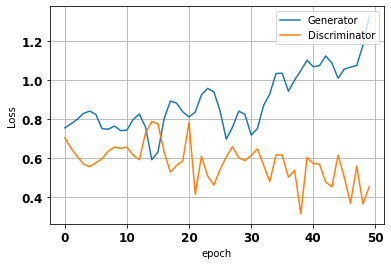

In [ ]:
g_ep = list(gen_plt.keys())
g_l = list(gen_plt.values())
plt.plot(g_ep,g_l)

d_ep = list(disc_plt.keys())
d_l = list(disc_plt.values())
plt.plot(d_ep,d_l)


  # plt.plot(history.history['val_categorical_accuracy'])
#plt.title('Generator - Discriminator Loss For Data 8 before Noise')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=12)
plt.tick_params(rotation=0,axis='x', labelsize=12)
plt.grid('white')
#plt.legend(prop={'size':20})
plt.legend(['Generator', 'Discriminator'], loc='upper right')
plt.show()
# plt.savefig('Generator - Discriminator Loss For Data 0.png')

In [ ]:
disc_plt = {}
gen_plt = {}
res=gen(X_oversampled.float().to(device))

fres=res.cpu().detach().numpy()
fres.shape

tu=X_train3.shape
fin=np.concatenate((X_res2[:(tu[0])], fres), axis=0)
Xn,yn=shuffle_in_unison(fin, y_res2)


# save dataset

In [ ]:
df_gan= np.concatenate((Xn, np.vstack(yn)), axis = 1)
df_gan= pd.DataFrame(df_gan)

In [ ]:
#df_gan.to_csv('/content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/Oversample_data/gan_5.csv')

In [ ]:
df_gan.to_csv('/content/drive/MyDrive/Ahsan/2023/Borderline_SMOTE/Gan.csv')

In [ ]:
df_gan.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.313211,0.310678,0.466897,0.090812,0.104772,0.175377,0.179742,0.490540,0.425397,0.181322,0.544345,0.500000
std,0.197821,0.187026,0.298956,0.076659,0.080030,0.123429,0.152910,0.209575,0.134584,0.074546,0.226636,0.500307
min,0.000000,0.000000,0.000000,0.020690,0.010499,0.000000,0.000000,0.009545,0.000000,0.000000,0.000000,0.000000
25%,0.148906,0.147727,0.198436,0.062069,0.074660,0.073784,0.055931,0.347283,0.321739,0.142041,0.375000,0.000000
50%,0.266853,0.272727,0.457033,0.075248,0.089343,0.140845,0.125786,0.483453,0.443478,0.164137,0.525178,0.500000
75%,0.429393,0.431818,0.716943,0.096552,0.118110,0.239437,0.264151,0.670338,0.495652,0.221034,0.732143,1.000000
max,1.000000,0.977273,1.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Epoch 1/30
26/26 [==============================] - 0s 8ms/step - loss: 0.4646 - accuracy: 0.5049
Epoch 2/30
26/26 [==============================] - 0s 7ms/step - loss: 0.2839 - accuracy: 0.7537
Epoch 3/30
26/26 [==============================] - 0s 6ms/step - loss: 0.2380 - accuracy: 0.7794
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.2177 - accuracy: 0.7843
Epoch 5/30
26/26 [==============================] - 0s 9ms/step - loss: 0.2043 - accuracy: 0.8051
Epoch 6/30
26/26 [==============================] - 0s 9ms/step - loss: 0.1857 - accuracy: 0.8946
Epoch 7/30
26/26 [==============================] - 0s 6ms/step - loss: 0.1794 - accuracy: 0.8799
Epoch 8/30
26/26 [==============================] - 0s 6ms/step - loss: 0.1708 - accuracy: 0.9142
Epoch 9/30
26/26 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9130
Epoch 10/30
26/26 [==============================] - 0s 9ms/step - loss: 0.1549 - accuracy: 0.9032
Epoch 11/30
26/26 

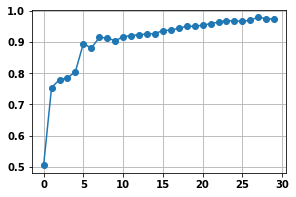

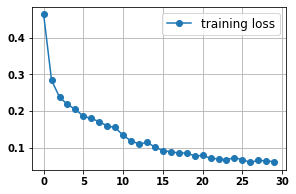

In [ ]:
t1=time.process_time()
history3= model1.fit(Xn, yn.ravel(), epochs=30)
t2 =time.process_time()
print("process time:", t2-t1)  
fig = plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(history3.history['accuracy'], label= 'training accuracy', marker='o')
#plt.plot(history3.history['val_accuracy'], label= 'val accuracy', marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
fig = plt.figure(figsize = (10, 3))
plt.subplot(122)
#plt.xlabel("number of epoch")
#plt.ylabel("loss")
plt.plot(history3.history['loss'], label = 'training loss',marker='o')
#plt.plot(history3.history['val_loss'], label = 'val loss',marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
plt.legend(prop={'size':12})

In [ ]:
yprr3=model1.predict(X_test1)
ypr3=(yprr3>0.5)*1
ypre3= np.ravel(yprr3)
print(classification_report(y_test1.ravel(),ypr3))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       104
           1       0.12      1.00      0.22         1

    accuracy                           0.93       105
   macro avg       0.56      0.97      0.59       105
weighted avg       0.99      0.93      0.96       105



In [ ]:
print("confusion matrix", confusion_matrix(y_test1.ravel(),ypr3))
test_loss3, test_acc3 = model1.evaluate(X_test1, y_test1.ravel(), verbose=2)
print('\nTest accuracy:', test_acc3)
tr_loss3, tr_acc3 = model1.evaluate(X_train3,y_train3.ravel(), verbose=2)
print('\nTrain accuracy:', tr_acc3)

confusion matrix [[97  7]
 [ 0  1]]
4/4 - 0s - loss: 0.1002 - accuracy: 0.9333 - 29ms/epoch - 7ms/step

Test accuracy: 0.9333333373069763
21/21 - 0s - loss: 0.0775 - accuracy: 0.9739 - 55ms/epoch - 3ms/step

Train accuracy: 0.9739263653755188


SMOTE & GAN & Neural Network

In [ ]:
t2=X_train3.shape
X_oversampled=X_res2[(t2[0]):]
df=pd.DataFrame (X_oversampled)
torch.cuda.empty_cache()


criterion = nn.BCEWithLogitsLoss()
n_epochs = 50
z_dim = t2[1]
batch_size = 32
lr = 0.00001
display_step = 1
device = 'cuda'
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):

    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2

    return disc_loss

def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):

    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

tensor_x = torch.Tensor(X_real) 
tensor_y = torch.Tensor(y_real)
my_dataset = TensorDataset(tensor_x,tensor_y)
dataloader = DataLoader(
    my_dataset,
    batch_size=batch_size,
    shuffle=True)

cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True 
gen_loss = False
error = False
for epoch in range(n_epochs):
  
   
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

       
        real = real.view(cur_batch_size, -1).to(device)

      
       
        disc_opt.zero_grad()

       
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

        
        disc_loss.backward(retain_graph=True)

       
        disc_opt.step()

      
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()

        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.02 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

     
        mean_discriminator_loss += disc_loss.item() / display_step

  
        mean_generator_loss += gen_loss.item() / display_step

 
        if cur_step % display_step == 0 and cur_step > 0:
            gen_plt[epoch] = mean_generator_loss
            disc_plt[epoch] = mean_discriminator_loss
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")

            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1
        # ekhane plot koribe
t4=X_oversampled.shape
fake_noise = get_noise((t4[0]), z_dim, device=device)
res2=gen(fake_noise)
fres2=res2.cpu().detach().numpy()
fres2.shape
fin2=np.concatenate((X_res2[:(t2[0])], fres2), axis=0)
Xnew,ynew=shuffle_in_unison(fin2, y_res2)

  0%|          | 0/11 [00:00<?, ?it/s]

Step 1: Generator loss: 1.615967035293579, discriminator loss: 1.237536370754242
Step 2: Generator loss: 0.8104669451713562, discriminator loss: 0.6042847037315369
Step 3: Generator loss: 0.8141559958457947, discriminator loss: 0.602480947971344
Step 4: Generator loss: 0.8146461248397827, discriminator loss: 0.6257719993591309
Step 5: Generator loss: 0.8089918494224548, discriminator loss: 0.6181968450546265
Step 6: Generator loss: 0.816728949546814, discriminator loss: 0.5873611569404602
Step 7: Generator loss: 0.819725751876831, discriminator loss: 0.5899732112884521
Step 8: Generator loss: 0.816057026386261, discriminator loss: 0.5753452777862549
Step 9: Generator loss: 0.8214319944381714, discriminator loss: 0.5525611639022827
Step 10: Generator loss: 0.8320044279098511, discriminator loss: 0.5880893468856812


  0%|          | 0/11 [00:00<?, ?it/s]

Step 11: Generator loss: 0.8354386687278748, discriminator loss: 0.5682691335678101
Step 12: Generator loss: 0.8282264471054077, discriminator loss: 0.596601128578186
Step 13: Generator loss: 0.8366100192070007, discriminator loss: 0.56842041015625
Step 14: Generator loss: 0.8357981443405151, discriminator loss: 0.5773823857307434
Step 15: Generator loss: 0.8348081111907959, discriminator loss: 0.5426334142684937
Step 16: Generator loss: 0.8315409421920776, discriminator loss: 0.5809851288795471
Step 17: Generator loss: 0.8378454446792603, discriminator loss: 0.5483416318893433
Step 18: Generator loss: 0.8417232632637024, discriminator loss: 0.5449477434158325
Step 19: Generator loss: 0.8345333337783813, discriminator loss: 0.5623879432678223
Step 20: Generator loss: 0.8372153043746948, discriminator loss: 0.5432718992233276
Step 21: Generator loss: 0.855272650718689, discriminator loss: 0.6456639766693115


  0%|          | 0/11 [00:00<?, ?it/s]

Step 22: Generator loss: 0.8355919122695923, discriminator loss: 0.5422654151916504
Step 23: Generator loss: 0.8379074335098267, discriminator loss: 0.5404695868492126
Step 24: Generator loss: 0.8327726125717163, discriminator loss: 0.558472216129303
Step 25: Generator loss: 0.8473626375198364, discriminator loss: 0.5421015024185181
Step 26: Generator loss: 0.8376668691635132, discriminator loss: 0.5435658097267151
Step 27: Generator loss: 0.851212203502655, discriminator loss: 0.5308651924133301
Step 28: Generator loss: 0.833991289138794, discriminator loss: 0.5430251359939575
Step 29: Generator loss: 0.8529202342033386, discriminator loss: 0.5238107442855835
Step 30: Generator loss: 0.8413544297218323, discriminator loss: 0.534532368183136
Step 31: Generator loss: 0.8576561808586121, discriminator loss: 0.5377254486083984
Step 32: Generator loss: 0.8297557234764099, discriminator loss: 0.5687493085861206


  0%|          | 0/11 [00:00<?, ?it/s]

Step 33: Generator loss: 0.854821503162384, discriminator loss: 0.5310302972793579
Step 34: Generator loss: 0.8453025221824646, discriminator loss: 0.5073579549789429
Step 35: Generator loss: 0.8533620834350586, discriminator loss: 0.5474444627761841
Step 36: Generator loss: 0.8531397581100464, discriminator loss: 0.5373024940490723
Step 37: Generator loss: 0.859494686126709, discriminator loss: 0.5180538892745972
Step 38: Generator loss: 0.8585183024406433, discriminator loss: 0.5427433252334595
Step 39: Generator loss: 0.8490345478057861, discriminator loss: 0.5385462045669556
Step 40: Generator loss: 0.8507136702537537, discriminator loss: 0.5247449278831482
Step 41: Generator loss: 0.852715015411377, discriminator loss: 0.5199054479598999
Step 42: Generator loss: 0.8448172211647034, discriminator loss: 0.5224882364273071
Step 43: Generator loss: 0.8463384509086609, discriminator loss: 0.5551098585128784


  0%|          | 0/11 [00:00<?, ?it/s]

Step 44: Generator loss: 0.8266885876655579, discriminator loss: 0.5354408621788025
Step 45: Generator loss: 0.8429544568061829, discriminator loss: 0.5268911719322205
Step 46: Generator loss: 0.8454498648643494, discriminator loss: 0.5310761332511902
Step 47: Generator loss: 0.8413823843002319, discriminator loss: 0.5407497882843018
Step 48: Generator loss: 0.8467034697532654, discriminator loss: 0.5331783294677734
Step 49: Generator loss: 0.8093454837799072, discriminator loss: 0.5384481549263
Step 50: Generator loss: 0.8366137146949768, discriminator loss: 0.5356961488723755
Step 51: Generator loss: 0.8258156776428223, discriminator loss: 0.5318895578384399
Step 52: Generator loss: 0.833791971206665, discriminator loss: 0.5424942374229431
Step 53: Generator loss: 0.8167124390602112, discriminator loss: 0.5321436524391174
Step 54: Generator loss: 0.7895383834838867, discriminator loss: 0.5601718425750732


  0%|          | 0/11 [00:00<?, ?it/s]

Step 55: Generator loss: 0.8394822478294373, discriminator loss: 0.5474292039871216
Step 56: Generator loss: 0.8282252550125122, discriminator loss: 0.5306434631347656
Step 57: Generator loss: 0.8233335018157959, discriminator loss: 0.5415489673614502
Step 58: Generator loss: 0.8473656177520752, discriminator loss: 0.5412260293960571
Step 59: Generator loss: 0.8494639992713928, discriminator loss: 0.5403764247894287
Step 60: Generator loss: 0.8442829847335815, discriminator loss: 0.5514549016952515
Step 61: Generator loss: 0.8401815891265869, discriminator loss: 0.5350037813186646
Step 62: Generator loss: 0.8510423302650452, discriminator loss: 0.5518534779548645
Step 63: Generator loss: 0.850760817527771, discriminator loss: 0.5489569902420044
Step 64: Generator loss: 0.8569464683532715, discriminator loss: 0.5426875948905945
Step 65: Generator loss: 0.8748376369476318, discriminator loss: 0.5359979867935181


  0%|          | 0/11 [00:00<?, ?it/s]

Step 66: Generator loss: 0.8668020963668823, discriminator loss: 0.5524714589118958
Step 67: Generator loss: 0.8551868200302124, discriminator loss: 0.5423454642295837
Step 68: Generator loss: 0.8504802584648132, discriminator loss: 0.5464364290237427
Step 69: Generator loss: 0.8508616089820862, discriminator loss: 0.5300502777099609
Step 70: Generator loss: 0.8505904674530029, discriminator loss: 0.5416898727416992
Step 71: Generator loss: 0.8470808267593384, discriminator loss: 0.5394989252090454
Step 72: Generator loss: 0.8582398891448975, discriminator loss: 0.5463915467262268
Step 73: Generator loss: 0.8399665355682373, discriminator loss: 0.5423544645309448
Step 74: Generator loss: 0.8547906875610352, discriminator loss: 0.5506728887557983
Step 75: Generator loss: 0.8444105386734009, discriminator loss: 0.5417834520339966
Step 76: Generator loss: 0.8010697364807129, discriminator loss: 0.5403438806533813


  0%|          | 0/11 [00:00<?, ?it/s]

Step 77: Generator loss: 0.8550691604614258, discriminator loss: 0.5430378913879395
Step 78: Generator loss: 0.8426465392112732, discriminator loss: 0.5455952882766724
Step 79: Generator loss: 0.8393664956092834, discriminator loss: 0.5509402751922607
Step 80: Generator loss: 0.8571934700012207, discriminator loss: 0.550407886505127
Step 81: Generator loss: 0.8339970707893372, discriminator loss: 0.542431652545929
Step 82: Generator loss: 0.8580600023269653, discriminator loss: 0.5475523471832275
Step 83: Generator loss: 0.8489153385162354, discriminator loss: 0.5447099804878235
Step 84: Generator loss: 0.8434360027313232, discriminator loss: 0.5441185832023621
Step 85: Generator loss: 0.8614070415496826, discriminator loss: 0.5458177924156189
Step 86: Generator loss: 0.8525718450546265, discriminator loss: 0.5430660843849182
Step 87: Generator loss: 0.8945528864860535, discriminator loss: 0.567358672618866


  0%|          | 0/11 [00:00<?, ?it/s]

Step 88: Generator loss: 0.8323053121566772, discriminator loss: 0.5531849265098572
Step 89: Generator loss: 0.8592254519462585, discriminator loss: 0.5520341396331787
Step 90: Generator loss: 0.8599317073822021, discriminator loss: 0.5626742839813232
Step 91: Generator loss: 0.8481408357620239, discriminator loss: 0.55418860912323
Step 92: Generator loss: 0.8571275472640991, discriminator loss: 0.5551939010620117
Step 93: Generator loss: 0.8624132871627808, discriminator loss: 0.555976390838623
Step 94: Generator loss: 0.8588296175003052, discriminator loss: 0.5611021518707275
Step 95: Generator loss: 0.8513177633285522, discriminator loss: 0.5441304445266724
Step 96: Generator loss: 0.9006630778312683, discriminator loss: 0.5537229776382446
Step 97: Generator loss: 0.8552628755569458, discriminator loss: 0.5542123317718506
Step 98: Generator loss: 0.8741118907928467, discriminator loss: 0.5068215131759644


  0%|          | 0/11 [00:00<?, ?it/s]

Step 99: Generator loss: 0.8586587905883789, discriminator loss: 0.5642822980880737
Step 100: Generator loss: 0.8741377592086792, discriminator loss: 0.5515769720077515
Step 101: Generator loss: 0.8510542511940002, discriminator loss: 0.5429590940475464
Step 102: Generator loss: 0.8544175624847412, discriminator loss: 0.5690721869468689
Step 103: Generator loss: 0.8370442390441895, discriminator loss: 0.5620758533477783
Step 104: Generator loss: 0.8551841974258423, discriminator loss: 0.557664692401886
Step 105: Generator loss: 0.8422507047653198, discriminator loss: 0.5770906209945679
Step 106: Generator loss: 0.8168569803237915, discriminator loss: 0.5708950161933899
Step 107: Generator loss: 0.8415433764457703, discriminator loss: 0.5653685927391052
Step 108: Generator loss: 0.80147385597229, discriminator loss: 0.5659832954406738
Step 109: Generator loss: 0.8130855560302734, discriminator loss: 0.598743736743927


  0%|          | 0/11 [00:00<?, ?it/s]

Step 110: Generator loss: 0.8169122338294983, discriminator loss: 0.579887866973877
Step 111: Generator loss: 0.8292675018310547, discriminator loss: 0.5980545282363892
Step 112: Generator loss: 0.8167713284492493, discriminator loss: 0.5833203196525574
Step 113: Generator loss: 0.8191413283348083, discriminator loss: 0.5920782685279846
Step 114: Generator loss: 0.7999507188796997, discriminator loss: 0.603792130947113
Step 115: Generator loss: 0.7971199154853821, discriminator loss: 0.6071107983589172
Step 116: Generator loss: 0.8035576343536377, discriminator loss: 0.6069116592407227
Step 117: Generator loss: 0.8086904287338257, discriminator loss: 0.6116679906845093
Step 118: Generator loss: 0.7812351584434509, discriminator loss: 0.6131411194801331
Step 119: Generator loss: 0.7714328169822693, discriminator loss: 0.6251847743988037
Step 120: Generator loss: 0.7842401266098022, discriminator loss: 0.63690185546875


  0%|          | 0/11 [00:00<?, ?it/s]

Step 121: Generator loss: 0.7466004490852356, discriminator loss: 0.6313669681549072
Step 122: Generator loss: 0.7523022890090942, discriminator loss: 0.6271401643753052
Step 123: Generator loss: 0.7339805364608765, discriminator loss: 0.6354851722717285
Step 124: Generator loss: 0.7365578413009644, discriminator loss: 0.6847270727157593
Step 125: Generator loss: 0.716116189956665, discriminator loss: 0.6466076970100403
Step 126: Generator loss: 0.6910391449928284, discriminator loss: 0.6701834201812744
Step 127: Generator loss: 0.726205050945282, discriminator loss: 0.704190731048584
Step 128: Generator loss: 0.6872031688690186, discriminator loss: 0.6793505549430847
Step 129: Generator loss: 0.6628975868225098, discriminator loss: 0.6984595060348511
Step 130: Generator loss: 0.6460481882095337, discriminator loss: 0.7238280773162842
Step 131: Generator loss: 0.7020868062973022, discriminator loss: 0.6779401302337646


  0%|          | 0/11 [00:00<?, ?it/s]

Step 132: Generator loss: 0.6553168296813965, discriminator loss: 0.7220950126647949
Step 133: Generator loss: 0.649659276008606, discriminator loss: 0.7325732111930847
Step 134: Generator loss: 0.6239125728607178, discriminator loss: 0.7229782938957214
Step 135: Generator loss: 0.6021473407745361, discriminator loss: 0.7736577987670898
Step 136: Generator loss: 0.6083065271377563, discriminator loss: 0.7772108316421509
Step 137: Generator loss: 0.5890375971794128, discriminator loss: 0.7695187926292419
Step 138: Generator loss: 0.5795171856880188, discriminator loss: 0.7998476028442383
Step 139: Generator loss: 0.5359026789665222, discriminator loss: 0.8018530607223511
Step 140: Generator loss: 0.54571133852005, discriminator loss: 0.8185641765594482
Step 141: Generator loss: 0.5768265724182129, discriminator loss: 0.7996038794517517
Step 142: Generator loss: 0.48918625712394714, discriminator loss: 0.841192901134491


  0%|          | 0/11 [00:00<?, ?it/s]

Step 143: Generator loss: 0.5478053689002991, discriminator loss: 0.8302192091941833
Step 144: Generator loss: 0.536217451095581, discriminator loss: 0.7997051477432251
Step 145: Generator loss: 0.5409282445907593, discriminator loss: 0.8334701061248779
Step 146: Generator loss: 0.5419142842292786, discriminator loss: 0.8084241151809692
Step 147: Generator loss: 0.5297788381576538, discriminator loss: 0.8142151236534119
Step 148: Generator loss: 0.5357648134231567, discriminator loss: 0.8139127492904663
Step 149: Generator loss: 0.5690284967422485, discriminator loss: 0.847030758857727
Step 150: Generator loss: 0.538964033126831, discriminator loss: 0.8286073207855225
Step 151: Generator loss: 0.5535043478012085, discriminator loss: 0.8310164213180542
Step 152: Generator loss: 0.5229297876358032, discriminator loss: 0.8211607933044434
Step 153: Generator loss: 0.5106744170188904, discriminator loss: 0.8214795589447021


  0%|          | 0/11 [00:00<?, ?it/s]

Step 154: Generator loss: 0.5414226055145264, discriminator loss: 0.802699089050293
Step 155: Generator loss: 0.5632150173187256, discriminator loss: 0.7952617406845093
Step 156: Generator loss: 0.5427533388137817, discriminator loss: 0.8373746871948242
Step 157: Generator loss: 0.5465134382247925, discriminator loss: 0.8010442852973938
Step 158: Generator loss: 0.5483174324035645, discriminator loss: 0.8196823596954346
Step 159: Generator loss: 0.551246166229248, discriminator loss: 0.7995051145553589
Step 160: Generator loss: 0.5561489462852478, discriminator loss: 0.8172173500061035
Step 161: Generator loss: 0.5589866638183594, discriminator loss: 0.809891939163208
Step 162: Generator loss: 0.5590220093727112, discriminator loss: 0.8036907911300659
Step 163: Generator loss: 0.5619091987609863, discriminator loss: 0.8029614090919495
Step 164: Generator loss: 0.5364395380020142, discriminator loss: 0.7945325374603271


  0%|          | 0/11 [00:00<?, ?it/s]

Step 165: Generator loss: 0.5650981068611145, discriminator loss: 0.7960586547851562
Step 166: Generator loss: 0.5685240030288696, discriminator loss: 0.8014228343963623
Step 167: Generator loss: 0.5674937963485718, discriminator loss: 0.801407516002655
Step 168: Generator loss: 0.5652998685836792, discriminator loss: 0.7798308730125427
Step 169: Generator loss: 0.5773282051086426, discriminator loss: 0.8038407564163208
Step 170: Generator loss: 0.5839180946350098, discriminator loss: 0.7772115468978882
Step 171: Generator loss: 0.5885284543037415, discriminator loss: 0.7900640964508057
Step 172: Generator loss: 0.5797385573387146, discriminator loss: 0.7474295496940613
Step 173: Generator loss: 0.59493088722229, discriminator loss: 0.7536482810974121
Step 174: Generator loss: 0.6016073822975159, discriminator loss: 0.7662606239318848
Step 175: Generator loss: 0.622409462928772, discriminator loss: 0.7455055713653564


  0%|          | 0/11 [00:00<?, ?it/s]

Step 176: Generator loss: 0.613172173500061, discriminator loss: 0.7490631341934204
Step 177: Generator loss: 0.6133714914321899, discriminator loss: 0.7659300565719604
Step 178: Generator loss: 0.6200919151306152, discriminator loss: 0.7713373303413391
Step 179: Generator loss: 0.6251384019851685, discriminator loss: 0.7162827849388123
Step 180: Generator loss: 0.6344888806343079, discriminator loss: 0.760256290435791
Step 181: Generator loss: 0.6315324902534485, discriminator loss: 0.7366072535514832
Step 182: Generator loss: 0.642648458480835, discriminator loss: 0.702354907989502
Step 183: Generator loss: 0.65156090259552, discriminator loss: 0.7261986136436462
Step 184: Generator loss: 0.6555926203727722, discriminator loss: 0.7324734926223755
Step 185: Generator loss: 0.6583846807479858, discriminator loss: 0.7117615938186646
Step 186: Generator loss: 0.6465773582458496, discriminator loss: 0.6743231415748596


  0%|          | 0/11 [00:00<?, ?it/s]

Step 187: Generator loss: 0.669584333896637, discriminator loss: 0.7038892507553101
Step 188: Generator loss: 0.6795551776885986, discriminator loss: 0.6872667074203491
Step 189: Generator loss: 0.6851475238800049, discriminator loss: 0.6992359161376953
Step 190: Generator loss: 0.6970813870429993, discriminator loss: 0.6785182952880859
Step 191: Generator loss: 0.6983572840690613, discriminator loss: 0.6865972876548767
Step 192: Generator loss: 0.7079513072967529, discriminator loss: 0.6908186674118042
Step 193: Generator loss: 0.7206743955612183, discriminator loss: 0.6741091012954712
Step 194: Generator loss: 0.7252790331840515, discriminator loss: 0.6698216795921326
Step 195: Generator loss: 0.7333325147628784, discriminator loss: 0.6796715259552002
Step 196: Generator loss: 0.736499547958374, discriminator loss: 0.6609690189361572
Step 197: Generator loss: 0.749722957611084, discriminator loss: 0.7049919366836548


  0%|          | 0/11 [00:00<?, ?it/s]

Step 198: Generator loss: 0.7464153170585632, discriminator loss: 0.652986466884613
Step 199: Generator loss: 0.7533332109451294, discriminator loss: 0.6473547220230103
Step 200: Generator loss: 0.7580366730690002, discriminator loss: 0.6372308731079102
Step 201: Generator loss: 0.7704058885574341, discriminator loss: 0.6340537667274475
Step 202: Generator loss: 0.7733305096626282, discriminator loss: 0.6211297512054443
Step 203: Generator loss: 0.7823042869567871, discriminator loss: 0.599657416343689
Step 204: Generator loss: 0.7897934913635254, discriminator loss: 0.6168766617774963
Step 205: Generator loss: 0.7915017604827881, discriminator loss: 0.6034500598907471
Step 206: Generator loss: 0.7970393896102905, discriminator loss: 0.6132346987724304
Step 207: Generator loss: 0.8152280449867249, discriminator loss: 0.6103936433792114
Step 208: Generator loss: 0.7933139204978943, discriminator loss: 0.5742813348770142


  0%|          | 0/11 [00:00<?, ?it/s]

Step 209: Generator loss: 0.8253291845321655, discriminator loss: 0.5933336019515991
Step 210: Generator loss: 0.8384613394737244, discriminator loss: 0.5838369131088257
Step 211: Generator loss: 0.8355036973953247, discriminator loss: 0.5713217854499817
Step 212: Generator loss: 0.8471514582633972, discriminator loss: 0.57243812084198
Step 213: Generator loss: 0.8462592363357544, discriminator loss: 0.5614063739776611
Step 214: Generator loss: 0.8585174083709717, discriminator loss: 0.5737767219543457
Step 215: Generator loss: 0.8646751642227173, discriminator loss: 0.5632526874542236
Step 216: Generator loss: 0.8666179180145264, discriminator loss: 0.5395007729530334
Step 217: Generator loss: 0.8752580285072327, discriminator loss: 0.5469532608985901
Step 218: Generator loss: 0.8899431228637695, discriminator loss: 0.5475187301635742
Step 219: Generator loss: 0.8824341297149658, discriminator loss: 0.5325086116790771


  0%|          | 0/11 [00:00<?, ?it/s]

Step 220: Generator loss: 0.8974481821060181, discriminator loss: 0.5564910173416138
Step 221: Generator loss: 0.9025441408157349, discriminator loss: 0.5416796207427979
Step 222: Generator loss: 0.8983044028282166, discriminator loss: 0.5415545701980591
Step 223: Generator loss: 0.9047584533691406, discriminator loss: 0.5056384205818176
Step 224: Generator loss: 0.8967154622077942, discriminator loss: 0.5160389542579651
Step 225: Generator loss: 0.9103050231933594, discriminator loss: 0.512604296207428
Step 226: Generator loss: 0.8967096209526062, discriminator loss: 0.5232696533203125
Step 227: Generator loss: 0.9262488484382629, discriminator loss: 0.5126583576202393
Step 228: Generator loss: 0.9321264028549194, discriminator loss: 0.5209513902664185
Step 229: Generator loss: 0.9178566336631775, discriminator loss: 0.5013768672943115
Step 230: Generator loss: 0.9166931509971619, discriminator loss: 0.5160896182060242


  0%|          | 0/11 [00:00<?, ?it/s]

Step 231: Generator loss: 0.9259371757507324, discriminator loss: 0.50069260597229
Step 232: Generator loss: 0.9232560396194458, discriminator loss: 0.5189788937568665
Step 233: Generator loss: 0.9047858119010925, discriminator loss: 0.5097397565841675
Step 234: Generator loss: 0.8930585384368896, discriminator loss: 0.5060025453567505
Step 235: Generator loss: 0.9023498296737671, discriminator loss: 0.49191561341285706
Step 236: Generator loss: 0.8985900282859802, discriminator loss: 0.5088823437690735
Step 237: Generator loss: 0.9255291223526001, discriminator loss: 0.5027225017547607
Step 238: Generator loss: 0.9135909080505371, discriminator loss: 0.4930065870285034
Step 239: Generator loss: 0.8949012756347656, discriminator loss: 0.5099093317985535
Step 240: Generator loss: 0.8975531458854675, discriminator loss: 0.5215493440628052
Step 241: Generator loss: 0.9087814688682556, discriminator loss: 0.49508583545684814


  0%|          | 0/11 [00:00<?, ?it/s]

Step 242: Generator loss: 0.9097963571548462, discriminator loss: 0.5214659571647644
Step 243: Generator loss: 0.9189131259918213, discriminator loss: 0.5117251873016357
Step 244: Generator loss: 0.9061269760131836, discriminator loss: 0.497109591960907
Step 245: Generator loss: 0.908905029296875, discriminator loss: 0.5222788453102112
Step 246: Generator loss: 0.9104324579238892, discriminator loss: 0.5123149156570435
Step 247: Generator loss: 0.9116146564483643, discriminator loss: 0.5149309635162354
Step 248: Generator loss: 0.8980247974395752, discriminator loss: 0.5084152817726135
Step 249: Generator loss: 0.9080768823623657, discriminator loss: 0.5005794763565063
Step 250: Generator loss: 0.915532648563385, discriminator loss: 0.4967183768749237
Step 251: Generator loss: 0.9147287607192993, discriminator loss: 0.49353283643722534
Step 252: Generator loss: 0.9093949198722839, discriminator loss: 0.5628634095191956


  0%|          | 0/11 [00:00<?, ?it/s]

Step 253: Generator loss: 0.9290239810943604, discriminator loss: 0.5142421126365662
Step 254: Generator loss: 0.9234849214553833, discriminator loss: 0.5048539638519287
Step 255: Generator loss: 0.9367624521255493, discriminator loss: 0.5233683586120605
Step 256: Generator loss: 0.9484049677848816, discriminator loss: 0.4917135238647461
Step 257: Generator loss: 0.9548091888427734, discriminator loss: 0.4944707155227661
Step 258: Generator loss: 0.9187134504318237, discriminator loss: 0.5152902007102966
Step 259: Generator loss: 0.9509052038192749, discriminator loss: 0.49026551842689514
Step 260: Generator loss: 0.9327819347381592, discriminator loss: 0.5087480545043945
Step 261: Generator loss: 0.9641600847244263, discriminator loss: 0.5042886137962341
Step 262: Generator loss: 0.9877125024795532, discriminator loss: 0.4896083474159241
Step 263: Generator loss: 0.8892426490783691, discriminator loss: 0.49247923493385315


  0%|          | 0/11 [00:00<?, ?it/s]

Step 264: Generator loss: 0.9651025533676147, discriminator loss: 0.49805521965026855
Step 265: Generator loss: 0.9839439392089844, discriminator loss: 0.5084139108657837
Step 266: Generator loss: 1.0087980031967163, discriminator loss: 0.493705153465271
Step 267: Generator loss: 1.0125877857208252, discriminator loss: 0.5018248558044434
Step 268: Generator loss: 0.9895424246788025, discriminator loss: 0.4912486672401428
Step 269: Generator loss: 1.0131340026855469, discriminator loss: 0.5159444212913513
Step 270: Generator loss: 0.9982461929321289, discriminator loss: 0.4933323860168457
Step 271: Generator loss: 1.0017284154891968, discriminator loss: 0.4899952709674835
Step 272: Generator loss: 0.9842013120651245, discriminator loss: 0.49535584449768066
Step 273: Generator loss: 0.9956600666046143, discriminator loss: 0.4960070252418518
Step 274: Generator loss: 1.0325911045074463, discriminator loss: 0.43543440103530884


  0%|          | 0/11 [00:00<?, ?it/s]

Step 275: Generator loss: 0.9652093648910522, discriminator loss: 0.5353161096572876
Step 276: Generator loss: 0.9811532497406006, discriminator loss: 0.5041064023971558
Step 277: Generator loss: 0.9420760869979858, discriminator loss: 0.4925256669521332
Step 278: Generator loss: 0.9799720644950867, discriminator loss: 0.5192196369171143
Step 279: Generator loss: 0.904887318611145, discriminator loss: 0.5081721544265747
Step 280: Generator loss: 0.9279626607894897, discriminator loss: 0.5145189762115479
Step 281: Generator loss: 0.9060486555099487, discriminator loss: 0.5251064300537109
Step 282: Generator loss: 0.9513804912567139, discriminator loss: 0.5017715692520142
Step 283: Generator loss: 0.9487607479095459, discriminator loss: 0.5036680102348328
Step 284: Generator loss: 0.9337283968925476, discriminator loss: 0.5290855765342712
Step 285: Generator loss: 0.8980903029441833, discriminator loss: 0.5231607556343079


  0%|          | 0/11 [00:00<?, ?it/s]

Step 286: Generator loss: 0.9358517527580261, discriminator loss: 0.5156663060188293
Step 287: Generator loss: 0.887671947479248, discriminator loss: 0.5295838713645935
Step 288: Generator loss: 0.9410361051559448, discriminator loss: 0.5340314507484436
Step 289: Generator loss: 0.9037717580795288, discriminator loss: 0.5305328369140625
Step 290: Generator loss: 0.9639381170272827, discriminator loss: 0.534568190574646
Step 291: Generator loss: 0.9249694347381592, discriminator loss: 0.5235168933868408
Step 292: Generator loss: 0.8887909650802612, discriminator loss: 0.4976159334182739
Step 293: Generator loss: 0.8999433517456055, discriminator loss: 0.5447765588760376
Step 294: Generator loss: 0.9228478670120239, discriminator loss: 0.500130295753479
Step 295: Generator loss: 0.9416216611862183, discriminator loss: 0.5141853094100952
Step 296: Generator loss: 0.9275316596031189, discriminator loss: 0.5550806522369385


  0%|          | 0/11 [00:00<?, ?it/s]

Step 297: Generator loss: 0.963425874710083, discriminator loss: 0.5024514198303223
Step 298: Generator loss: 0.9566344022750854, discriminator loss: 0.4933604300022125
Step 299: Generator loss: 0.9815195798873901, discriminator loss: 0.5102877616882324
Step 300: Generator loss: 0.9623438715934753, discriminator loss: 0.4859845042228699
Step 301: Generator loss: 0.9533590078353882, discriminator loss: 0.49803268909454346
Step 302: Generator loss: 0.991870105266571, discriminator loss: 0.49611204862594604
Step 303: Generator loss: 0.9647993445396423, discriminator loss: 0.4925508499145508
Step 304: Generator loss: 0.9658018350601196, discriminator loss: 0.46813511848449707
Step 305: Generator loss: 1.0134059190750122, discriminator loss: 0.49166250228881836
Step 306: Generator loss: 1.0049961805343628, discriminator loss: 0.46028226613998413
Step 307: Generator loss: 0.9149669408798218, discriminator loss: 0.42939531803131104


  0%|          | 0/11 [00:00<?, ?it/s]

Step 308: Generator loss: 1.029497742652893, discriminator loss: 0.4613568186759949
Step 309: Generator loss: 1.0131127834320068, discriminator loss: 0.44588011503219604
Step 310: Generator loss: 1.0427920818328857, discriminator loss: 0.5144276022911072
Step 311: Generator loss: 1.0221302509307861, discriminator loss: 0.4514583945274353
Step 312: Generator loss: 0.9988778829574585, discriminator loss: 0.4432215690612793
Step 313: Generator loss: 1.0289523601531982, discriminator loss: 0.470810204744339
Step 314: Generator loss: 1.0008788108825684, discriminator loss: 0.46603092551231384
Step 315: Generator loss: 1.0096946954727173, discriminator loss: 0.4703570604324341
Step 316: Generator loss: 0.9835813045501709, discriminator loss: 0.45876646041870117
Step 317: Generator loss: 0.9792459011077881, discriminator loss: 0.47379228472709656
Step 318: Generator loss: 1.042489767074585, discriminator loss: 0.5559180378913879


  0%|          | 0/11 [00:00<?, ?it/s]

Step 319: Generator loss: 0.9162715673446655, discriminator loss: 0.47070246934890747
Step 320: Generator loss: 0.9581671953201294, discriminator loss: 0.4856281578540802
Step 321: Generator loss: 0.9320247173309326, discriminator loss: 0.5114548802375793
Step 322: Generator loss: 0.9668184518814087, discriminator loss: 0.47777634859085083
Step 323: Generator loss: 0.915056049823761, discriminator loss: 0.4704422354698181
Step 324: Generator loss: 0.8956859111785889, discriminator loss: 0.508561372756958
Step 325: Generator loss: 0.9134079217910767, discriminator loss: 0.500103771686554
Step 326: Generator loss: 0.9186971187591553, discriminator loss: 0.5193701982498169
Step 327: Generator loss: 0.9183413982391357, discriminator loss: 0.5349280834197998
Step 328: Generator loss: 0.8778691291809082, discriminator loss: 0.5387386679649353
Step 329: Generator loss: 0.8996514081954956, discriminator loss: 0.5945436954498291


  0%|          | 0/11 [00:00<?, ?it/s]

Step 330: Generator loss: 0.8706326484680176, discriminator loss: 0.5449882745742798
Step 331: Generator loss: 0.859642505645752, discriminator loss: 0.5356730222702026
Step 332: Generator loss: 0.8804222345352173, discriminator loss: 0.5426357984542847
Step 333: Generator loss: 0.8445813059806824, discriminator loss: 0.54897141456604
Step 334: Generator loss: 0.9193204641342163, discriminator loss: 0.586616039276123
Step 335: Generator loss: 0.848067045211792, discriminator loss: 0.6073729395866394
Step 336: Generator loss: 0.8378757238388062, discriminator loss: 0.5869640707969666
Step 337: Generator loss: 0.8655499815940857, discriminator loss: 0.5753587484359741
Step 338: Generator loss: 0.8535401821136475, discriminator loss: 0.5827439427375793
Step 339: Generator loss: 0.8656021356582642, discriminator loss: 0.5909421443939209
Step 340: Generator loss: 1.001022458076477, discriminator loss: 0.6374907493591309


  0%|          | 0/11 [00:00<?, ?it/s]

Step 341: Generator loss: 0.8483574390411377, discriminator loss: 0.6279928088188171
Step 342: Generator loss: 0.8171972632408142, discriminator loss: 0.6015557050704956
Step 343: Generator loss: 0.828915536403656, discriminator loss: 0.6094897985458374
Step 344: Generator loss: 0.8518834710121155, discriminator loss: 0.6016786098480225
Step 345: Generator loss: 0.8543784022331238, discriminator loss: 0.6173302531242371
Step 346: Generator loss: 0.8432648181915283, discriminator loss: 0.6152833104133606
Step 347: Generator loss: 0.8344367742538452, discriminator loss: 0.6369709968566895
Step 348: Generator loss: 0.8257129788398743, discriminator loss: 0.6165636777877808
Step 349: Generator loss: 0.8446927070617676, discriminator loss: 0.6411685943603516
Step 350: Generator loss: 0.8318349719047546, discriminator loss: 0.6299075484275818
Step 351: Generator loss: 0.866483211517334, discriminator loss: 0.6401923894882202


  0%|          | 0/11 [00:00<?, ?it/s]

Step 352: Generator loss: 0.8608756065368652, discriminator loss: 0.6153846979141235
Step 353: Generator loss: 0.8343642950057983, discriminator loss: 0.6250934600830078
Step 354: Generator loss: 0.864162802696228, discriminator loss: 0.6145471334457397
Step 355: Generator loss: 0.8599523305892944, discriminator loss: 0.6234779357910156
Step 356: Generator loss: 0.8730155825614929, discriminator loss: 0.6259490251541138
Step 357: Generator loss: 0.868183970451355, discriminator loss: 0.6109371781349182
Step 358: Generator loss: 0.8739497065544128, discriminator loss: 0.6208599805831909
Step 359: Generator loss: 0.8725588321685791, discriminator loss: 0.6016493439674377
Step 360: Generator loss: 0.8826283812522888, discriminator loss: 0.6099627017974854
Step 361: Generator loss: 0.911551833152771, discriminator loss: 0.574285626411438
Step 362: Generator loss: 0.9043853282928467, discriminator loss: 0.6243120431900024


  0%|          | 0/11 [00:00<?, ?it/s]

Step 363: Generator loss: 0.9030760526657104, discriminator loss: 0.5883967876434326
Step 364: Generator loss: 0.9066606163978577, discriminator loss: 0.5684928894042969
Step 365: Generator loss: 0.90738445520401, discriminator loss: 0.5771453380584717
Step 366: Generator loss: 0.9232667684555054, discriminator loss: 0.5550388693809509
Step 367: Generator loss: 0.948743999004364, discriminator loss: 0.5520559549331665
Step 368: Generator loss: 0.9601494073867798, discriminator loss: 0.5410865545272827
Step 369: Generator loss: 0.9589806795120239, discriminator loss: 0.5474957823753357
Step 370: Generator loss: 0.9786825776100159, discriminator loss: 0.5357189178466797
Step 371: Generator loss: 0.9663650393486023, discriminator loss: 0.5360630750656128
Step 372: Generator loss: 0.9730032682418823, discriminator loss: 0.5150598287582397
Step 373: Generator loss: 1.000087022781372, discriminator loss: 0.5187389850616455


  0%|          | 0/11 [00:00<?, ?it/s]

Step 374: Generator loss: 0.9973483085632324, discriminator loss: 0.5095890760421753
Step 375: Generator loss: 1.012068510055542, discriminator loss: 0.49604499340057373
Step 376: Generator loss: 1.0115426778793335, discriminator loss: 0.4895632565021515
Step 377: Generator loss: 1.0069580078125, discriminator loss: 0.47742974758148193
Step 378: Generator loss: 1.0429664850234985, discriminator loss: 0.48420780897140503
Step 379: Generator loss: 1.0285663604736328, discriminator loss: 0.4850023686885834
Step 380: Generator loss: 1.0469160079956055, discriminator loss: 0.47232842445373535
Step 381: Generator loss: 1.069420576095581, discriminator loss: 0.46676889061927795
Step 382: Generator loss: 1.0993715524673462, discriminator loss: 0.45802342891693115
Step 383: Generator loss: 1.0705763101577759, discriminator loss: 0.45507144927978516
Step 384: Generator loss: 1.0473084449768066, discriminator loss: 0.46768736839294434


  0%|          | 0/11 [00:00<?, ?it/s]

Step 385: Generator loss: 1.1141562461853027, discriminator loss: 0.45435768365859985
Step 386: Generator loss: 1.1420952081680298, discriminator loss: 0.4387296438217163
Step 387: Generator loss: 1.1358014345169067, discriminator loss: 0.45256876945495605
Step 388: Generator loss: 1.1279349327087402, discriminator loss: 0.4248301088809967
Step 389: Generator loss: 1.1177167892456055, discriminator loss: 0.434675008058548
Step 390: Generator loss: 1.1478066444396973, discriminator loss: 0.4367114305496216
Step 391: Generator loss: 1.1338937282562256, discriminator loss: 0.4122866690158844
Step 392: Generator loss: 1.1318110227584839, discriminator loss: 0.43045926094055176
Step 393: Generator loss: 1.1697378158569336, discriminator loss: 0.4291442632675171
Step 394: Generator loss: 1.141970157623291, discriminator loss: 0.42172175645828247
Step 395: Generator loss: 1.0292818546295166, discriminator loss: 0.409706175327301


  0%|          | 0/11 [00:00<?, ?it/s]

Step 396: Generator loss: 1.1416552066802979, discriminator loss: 0.42432087659835815
Step 397: Generator loss: 1.0773206949234009, discriminator loss: 0.4051584005355835
Step 398: Generator loss: 1.066910743713379, discriminator loss: 0.41730350255966187
Step 399: Generator loss: 1.0262668132781982, discriminator loss: 0.44234132766723633
Step 400: Generator loss: 1.1331042051315308, discriminator loss: 0.4688958525657654
Step 401: Generator loss: 1.0522968769073486, discriminator loss: 0.44838008284568787
Step 402: Generator loss: 1.0585302114486694, discriminator loss: 0.4282791018486023
Step 403: Generator loss: 1.0484586954116821, discriminator loss: 0.444478303194046
Step 404: Generator loss: 1.0301295518875122, discriminator loss: 0.4621850550174713
Step 405: Generator loss: 1.0589901208877563, discriminator loss: 0.45486119389533997
Step 406: Generator loss: 0.9053009748458862, discriminator loss: 0.5522827506065369


  0%|          | 0/11 [00:00<?, ?it/s]

Step 407: Generator loss: 1.0271774530410767, discriminator loss: 0.465770423412323
Step 408: Generator loss: 0.9905557632446289, discriminator loss: 0.4573625326156616
Step 409: Generator loss: 1.0617276430130005, discriminator loss: 0.47060108184814453
Step 410: Generator loss: 0.9987200498580933, discriminator loss: 0.47612884640693665
Step 411: Generator loss: 1.0123507976531982, discriminator loss: 0.45919737219810486
Step 412: Generator loss: 1.0043889284133911, discriminator loss: 0.4653196930885315
Step 413: Generator loss: 1.0178465843200684, discriminator loss: 0.47052568197250366
Step 414: Generator loss: 1.027302622795105, discriminator loss: 0.46024399995803833
Step 415: Generator loss: 1.007805585861206, discriminator loss: 0.4469657242298126
Step 416: Generator loss: 1.056817889213562, discriminator loss: 0.4434272050857544
Step 417: Generator loss: 1.0085934400558472, discriminator loss: 0.4380205571651459


  0%|          | 0/11 [00:00<?, ?it/s]

Step 418: Generator loss: 1.0880945920944214, discriminator loss: 0.44532737135887146
Step 419: Generator loss: 1.0686193704605103, discriminator loss: 0.4636004567146301
Step 420: Generator loss: 1.0549514293670654, discriminator loss: 0.44918978214263916
Step 421: Generator loss: 1.107033133506775, discriminator loss: 0.4295063018798828
Step 422: Generator loss: 1.1218786239624023, discriminator loss: 0.43858715891838074
Step 423: Generator loss: 1.158137321472168, discriminator loss: 0.4159488081932068
Step 424: Generator loss: 1.1349085569381714, discriminator loss: 0.385969340801239
Step 425: Generator loss: 1.1596407890319824, discriminator loss: 0.3949555456638336
Step 426: Generator loss: 1.153304100036621, discriminator loss: 0.3706091344356537
Step 427: Generator loss: 1.2041670083999634, discriminator loss: 0.35228556394577026
Step 428: Generator loss: 1.260420560836792, discriminator loss: 0.3880762457847595


  0%|          | 0/11 [00:00<?, ?it/s]

Step 429: Generator loss: 1.2059805393218994, discriminator loss: 0.3500807285308838
Step 430: Generator loss: 1.215671181678772, discriminator loss: 0.35598793625831604
Step 431: Generator loss: 1.2258458137512207, discriminator loss: 0.35766685009002686
Step 432: Generator loss: 1.2644459009170532, discriminator loss: 0.3639652729034424
Step 433: Generator loss: 1.2622272968292236, discriminator loss: 0.35025107860565186
Step 434: Generator loss: 1.2568199634552002, discriminator loss: 0.34132352471351624
Step 435: Generator loss: 1.260216236114502, discriminator loss: 0.3412591218948364
Step 436: Generator loss: 1.3034107685089111, discriminator loss: 0.31857234239578247
Step 437: Generator loss: 1.2741233110427856, discriminator loss: 0.3067858815193176
Step 438: Generator loss: 1.3162626028060913, discriminator loss: 0.3213343322277069
Step 439: Generator loss: 1.312487006187439, discriminator loss: 0.339491605758667


  0%|          | 0/11 [00:00<?, ?it/s]

Step 440: Generator loss: 1.3474271297454834, discriminator loss: 0.2908381223678589
Step 441: Generator loss: 1.3376277685165405, discriminator loss: 0.29685986042022705
Step 442: Generator loss: 1.384070873260498, discriminator loss: 0.2949175536632538
Step 443: Generator loss: 1.3603886365890503, discriminator loss: 0.2949533462524414
Step 444: Generator loss: 1.393446922302246, discriminator loss: 0.2737906873226166
Step 445: Generator loss: 1.4189558029174805, discriminator loss: 0.2746050953865051
Step 446: Generator loss: 1.4122467041015625, discriminator loss: 0.2789648771286011
Step 447: Generator loss: 1.4401673078536987, discriminator loss: 0.26854264736175537
Step 448: Generator loss: 1.4498772621154785, discriminator loss: 0.2664058208465576
Step 449: Generator loss: 1.467024803161621, discriminator loss: 0.25180482864379883
Step 450: Generator loss: 1.4284844398498535, discriminator loss: 0.22981050610542297


  0%|          | 0/11 [00:00<?, ?it/s]

Step 451: Generator loss: 1.522289752960205, discriminator loss: 0.24413040280342102
Step 452: Generator loss: 1.5332707166671753, discriminator loss: 0.24227222800254822
Step 453: Generator loss: 1.538645625114441, discriminator loss: 0.23860639333724976
Step 454: Generator loss: 1.560878038406372, discriminator loss: 0.23738056421279907
Step 455: Generator loss: 1.5580999851226807, discriminator loss: 0.23996947705745697
Step 456: Generator loss: 1.5657122135162354, discriminator loss: 0.22854726016521454
Step 457: Generator loss: 1.573490023612976, discriminator loss: 0.24828152358531952
Step 458: Generator loss: 1.601003885269165, discriminator loss: 0.22046920657157898
Step 459: Generator loss: 1.6255378723144531, discriminator loss: 0.21182726323604584
Step 460: Generator loss: 1.625162959098816, discriminator loss: 0.20782995223999023
Step 461: Generator loss: 1.676152229309082, discriminator loss: 0.2498115748167038


  0%|          | 0/11 [00:00<?, ?it/s]

Step 462: Generator loss: 1.654325008392334, discriminator loss: 0.2040882110595703
Step 463: Generator loss: 1.6483545303344727, discriminator loss: 0.21630129218101501
Step 464: Generator loss: 1.6720831394195557, discriminator loss: 0.20520855486392975
Step 465: Generator loss: 1.6903982162475586, discriminator loss: 0.19623520970344543
Step 466: Generator loss: 1.7119519710540771, discriminator loss: 0.20752063393592834
Step 467: Generator loss: 1.6725765466690063, discriminator loss: 0.18848171830177307
Step 468: Generator loss: 1.694230079650879, discriminator loss: 0.19504448771476746
Step 469: Generator loss: 1.7479848861694336, discriminator loss: 0.1951056718826294
Step 470: Generator loss: 1.7327790260314941, discriminator loss: 0.19732753932476044
Step 471: Generator loss: 1.7305984497070312, discriminator loss: 0.19591635465621948
Step 472: Generator loss: 1.7379564046859741, discriminator loss: 0.19813172519207


  0%|          | 0/11 [00:00<?, ?it/s]

Step 473: Generator loss: 1.7337015867233276, discriminator loss: 0.18224085867404938
Step 474: Generator loss: 1.7041507959365845, discriminator loss: 0.19548004865646362
Step 475: Generator loss: 1.7645288705825806, discriminator loss: 0.18702487647533417
Step 476: Generator loss: 1.7494515180587769, discriminator loss: 0.1833713799715042
Step 477: Generator loss: 1.7082453966140747, discriminator loss: 0.1755828559398651
Step 478: Generator loss: 1.6920415163040161, discriminator loss: 0.1963096708059311
Step 479: Generator loss: 1.760629415512085, discriminator loss: 0.19022780656814575
Step 480: Generator loss: 1.768113136291504, discriminator loss: 0.1895914226770401
Step 481: Generator loss: 1.7588448524475098, discriminator loss: 0.1930152177810669
Step 482: Generator loss: 1.7422600984573364, discriminator loss: 0.18085479736328125
Step 483: Generator loss: 1.65084969997406, discriminator loss: 0.19528985023498535


  0%|          | 0/11 [00:00<?, ?it/s]

Step 484: Generator loss: 1.693861484527588, discriminator loss: 0.18900202214717865
Step 485: Generator loss: 1.6653082370758057, discriminator loss: 0.18868887424468994
Step 486: Generator loss: 1.7415449619293213, discriminator loss: 0.18472802639007568
Step 487: Generator loss: 1.6916649341583252, discriminator loss: 0.18016991019248962
Step 488: Generator loss: 1.6604540348052979, discriminator loss: 0.1856272965669632
Step 489: Generator loss: 1.673793911933899, discriminator loss: 0.19338640570640564
Step 490: Generator loss: 1.7304675579071045, discriminator loss: 0.1949949711561203
Step 491: Generator loss: 1.7107003927230835, discriminator loss: 0.18762972950935364
Step 492: Generator loss: 1.6234452724456787, discriminator loss: 0.2041599303483963
Step 493: Generator loss: 1.664062261581421, discriminator loss: 0.2034560739994049
Step 494: Generator loss: 1.5934741497039795, discriminator loss: 0.1813669502735138


  0%|          | 0/11 [00:00<?, ?it/s]

Step 495: Generator loss: 1.6893393993377686, discriminator loss: 0.19768685102462769
Step 496: Generator loss: 1.6696118116378784, discriminator loss: 0.1976013332605362
Step 497: Generator loss: 1.6460864543914795, discriminator loss: 0.19908905029296875
Step 498: Generator loss: 1.6639176607131958, discriminator loss: 0.20155927538871765
Step 499: Generator loss: 1.58950936794281, discriminator loss: 0.20166143774986267
Step 500: Generator loss: 1.6319832801818848, discriminator loss: 0.2183152586221695
Step 501: Generator loss: 1.6060713529586792, discriminator loss: 0.20396079123020172
Step 502: Generator loss: 1.6050117015838623, discriminator loss: 0.2070915549993515
Step 503: Generator loss: 1.610838770866394, discriminator loss: 0.22081632912158966
Step 504: Generator loss: 1.582619071006775, discriminator loss: 0.20530158281326294
Step 505: Generator loss: 1.5163583755493164, discriminator loss: 0.23595891892910004


  0%|          | 0/11 [00:00<?, ?it/s]

Step 506: Generator loss: 1.5524122714996338, discriminator loss: 0.21081101894378662
Step 507: Generator loss: 1.673572063446045, discriminator loss: 0.22816166281700134
Step 508: Generator loss: 1.6312283277511597, discriminator loss: 0.2231123149394989
Step 509: Generator loss: 1.6181329488754272, discriminator loss: 0.2236066460609436
Step 510: Generator loss: 1.5526103973388672, discriminator loss: 0.2174057811498642
Step 511: Generator loss: 1.59525728225708, discriminator loss: 0.2082192301750183
Step 512: Generator loss: 1.5995402336120605, discriminator loss: 0.22171029448509216
Step 513: Generator loss: 1.5646116733551025, discriminator loss: 0.21764309704303741
Step 514: Generator loss: 1.5649124383926392, discriminator loss: 0.217805877327919
Step 515: Generator loss: 1.6585805416107178, discriminator loss: 0.22012709081172943
Step 516: Generator loss: 1.5765113830566406, discriminator loss: 0.17506715655326843


  0%|          | 0/11 [00:00<?, ?it/s]

Step 517: Generator loss: 1.6022347211837769, discriminator loss: 0.2201322317123413
Step 518: Generator loss: 1.5463733673095703, discriminator loss: 0.22283978760242462
Step 519: Generator loss: 1.5997052192687988, discriminator loss: 0.21928124129772186
Step 520: Generator loss: 1.6524040699005127, discriminator loss: 0.22531096637248993
Step 521: Generator loss: 1.6149194240570068, discriminator loss: 0.21721458435058594
Step 522: Generator loss: 1.5329841375350952, discriminator loss: 0.23379738628864288
Step 523: Generator loss: 1.5681042671203613, discriminator loss: 0.22307740151882172
Step 524: Generator loss: 1.606108546257019, discriminator loss: 0.23631320893764496
Step 525: Generator loss: 1.5687260627746582, discriminator loss: 0.2224118858575821
Step 526: Generator loss: 1.5903754234313965, discriminator loss: 0.23722262680530548
Step 527: Generator loss: 1.677772879600525, discriminator loss: 0.21020227670669556


  0%|          | 0/11 [00:00<?, ?it/s]

Step 528: Generator loss: 1.546694040298462, discriminator loss: 0.2182263284921646
Step 529: Generator loss: 1.464641809463501, discriminator loss: 0.25845515727996826
Step 530: Generator loss: 1.4451541900634766, discriminator loss: 0.23475396633148193
Step 531: Generator loss: 1.3846211433410645, discriminator loss: 0.23091816902160645
Step 532: Generator loss: 1.4736783504486084, discriminator loss: 0.2576586604118347
Step 533: Generator loss: 1.4115391969680786, discriminator loss: 0.25784340500831604
Step 534: Generator loss: 1.4824609756469727, discriminator loss: 0.264356791973114
Step 535: Generator loss: 1.360170602798462, discriminator loss: 0.2730933427810669
Step 536: Generator loss: 1.3862465620040894, discriminator loss: 0.28469324111938477
Step 537: Generator loss: 1.3678005933761597, discriminator loss: 0.3018507659435272
Step 538: Generator loss: 1.0609312057495117, discriminator loss: 0.27546748518943787


  0%|          | 0/11 [00:00<?, ?it/s]

Step 539: Generator loss: 1.1975432634353638, discriminator loss: 0.29905933141708374
Step 540: Generator loss: 1.172606348991394, discriminator loss: 0.30920693278312683
Step 541: Generator loss: 1.3127397298812866, discriminator loss: 0.31372204422950745
Step 542: Generator loss: 1.2909224033355713, discriminator loss: 0.3279998004436493
Step 543: Generator loss: 1.286546230316162, discriminator loss: 0.3374077081680298
Step 544: Generator loss: 1.297649621963501, discriminator loss: 0.3103580176830292
Step 545: Generator loss: 1.259687900543213, discriminator loss: 0.34096401929855347
Step 546: Generator loss: 1.3583343029022217, discriminator loss: 0.3270464539527893
Step 547: Generator loss: 1.3101422786712646, discriminator loss: 0.2922896444797516
Step 548: Generator loss: 1.2898502349853516, discriminator loss: 0.3334689736366272
Step 549: Generator loss: 1.1277002096176147, discriminator loss: 0.3399670124053955


# save dataset

In [ ]:
df_ssg= np.concatenate((Xnew, np.vstack(ynew)), axis = 1)
df_ssg= pd.DataFrame(df_ssg)

In [ ]:
#df_ssg.to_csv('/content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/Oversample_data/ssg_5.csv')

In [ ]:
df_ssg.to_csv('/content/drive/MyDrive/Ahsan/2023/Borderline_SMOTE/bsgan.csv')

In [ ]:
df_ssg.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.338537,0.451947,0.365083,0.081687,0.099158,0.277543,0.189661,0.377917,0.340396,0.188649,0.488163,0.500000
std,0.183385,0.235541,0.224834,0.082050,0.082778,0.194474,0.145741,0.173628,0.188367,0.074767,0.209275,0.500307
min,0.000000,0.000000,0.000000,0.010181,0.010499,0.000000,0.000000,0.009545,0.000000,0.000000,0.000000,0.000000
25%,0.218750,0.249942,0.181070,0.048276,0.054097,0.112676,0.086247,0.229346,0.217391,0.147744,0.357143,0.000000
50%,0.294107,0.386364,0.358974,0.075248,0.089343,0.222932,0.130131,0.375184,0.347826,0.180645,0.476466,0.500000
75%,0.429393,0.670455,0.538462,0.096552,0.118110,0.405756,0.264151,0.508811,0.469565,0.228449,0.571429,1.000000
max,1.000000,0.977273,1.000000,1.000000,1.000000,0.767771,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Epoch 1/30
26/26 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9314
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9718
Epoch 3/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9767
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9804
Epoch 5/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9792
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9767
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9755
Epoch 8/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9804
Epoch 9/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9828
Epoch 10/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 11/30
26/26 [

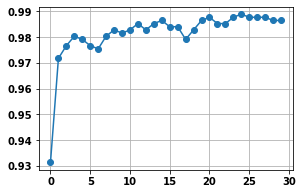

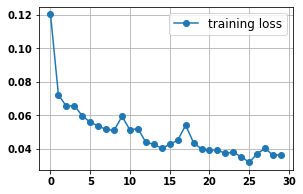

In [ ]:
t1=time.process_time()
history3= model1.fit(Xnew,ynew.ravel(), epochs=30)
t2 =time.process_time()
print("process time:", t2-t1)  
fig = plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(history3.history['accuracy'], label= 'training accuracy', marker='o')
#plt.plot(history3.history['val_accuracy'], label= 'val accuracy', marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
fig = plt.figure(figsize = (10, 3))
plt.subplot(122)
#plt.xlabel("number of epoch")
#plt.ylabel("loss")
plt.plot(history3.history['loss'], label = 'training loss',marker='o')
#plt.plot(history3.history['val_loss'], label = 'val loss',marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
plt.legend(prop={'size':12})

In [ ]:
yprr3=model1.predict(X_test1)
ypr3=(yprr3>0.5)*1
ypre3= np.ravel(yprr3)
print(classification_report(y_test1.ravel(),ypr3))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       104
           1       0.14      1.00      0.25         1

    accuracy                           0.94       105
   macro avg       0.57      0.97      0.61       105
weighted avg       0.99      0.94      0.96       105



In [ ]:
print("confusion matrix", confusion_matrix(y_test1.ravel(),ypr3))
test_loss3, test_acc3 = model1.evaluate(X_test1, y_test1.ravel(), verbose=2)
print('\nTest accuracy:', test_acc3)
tr_loss3, tr_acc3 = model1.evaluate(Xnew,ynew.ravel(), verbose=2)
print('\nTrain accuracy:', tr_acc3)

confusion matrix [[98  6]
 [ 0  1]]
4/4 - 0s - loss: 0.0725 - accuracy: 0.9429 - 38ms/epoch - 9ms/step

Test accuracy: 0.9428571462631226
26/26 - 0s - loss: 0.0356 - accuracy: 0.9890 - 71ms/epoch - 3ms/step

Train accuracy: 0.9889705777168274


In [ ]:
df_ssg= np.concatenate((Xnew, np.vstack(ynew)), axis = 1)
df_ssg = pd.DataFrame(df_ssg)

In [ ]:
df_ssg.to_csv("/content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/gansmote5.csv")

In [ ]:
df_ssg.shape

(816, 12)

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=38dd845949ad0fcfaf301885c516e39c3fa97218f320c0a2dc71eab2e876248d
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lime.lime_tabular

In [ ]:
#separação de previsões de classe
previsores = df_ssg.iloc[:,0:10].values
classe = df_ssg.iloc[:,10].values

In [ ]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])

In [ ]:
#separamos em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
model1.fit(X_treinamento, y_treinamento, epochs=10)

Epoch 1/10


ValueError: ignored

In [ ]:
#criamos o objeto lime
expl = lime.lime_tabular.LimeTabularExplainer(X_treinamento, feature_names=list(df_ssg)[0:10],class_names="class")

In [ ]:
#função prever
prever = lambda x: model1.predict(x).astype(float)

In [ ]:
#linha escolhida
X_teste[0]

In [ ]:
previsoes = model1.predict(X_teste[:1,:10])
previsoes

In [ ]:
previsoes=np.round(previsoes)

In [ ]:
#exclipcação, num_features é o número máximo de features que serão mostrados na explicação
exp = expl.explain_instance(X_teste[0], previsoes, num_features=1)
exp.show_in_notebook(show_all=True)

# here we will test the model performance on the test dataset using different machine learning algorithms


In [ ]:
# without SMOTE
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.ensemble import AdaBoostClassifier as AB
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
clf= DT()
cv = StratifiedKFold(n_splits=5,shuffle=False)
print("Result for KNN''''''''''''''''''''''''''''")
print("''''''''''''''''''''''accuracy''''''''''''''''''")
print(cross_val_score(clf, Xnew,ynew, scoring="accuracy", cv = cv))
print("''''''''''''''''''''''precision''''''''''''''''''")
print(cross_val_score(clf, Xnew,ynew, scoring="precision", cv = cv))
print("''''''''''''''''''''''recall''''''''''''''''''")
print(cross_val_score(clf, Xnew,ynew, scoring="recall", cv = cv))
print("''''''''''''''''''''''f score''''''''''''''''''")
print(cross_val_score(clf, Xnew,ynew, scoring="f1", cv = cv))
print("''''''''''''''''''''''roc-auc''''''''''''''''''")
print(cross_val_score(clf, Xnew,ynew, scoring="roc_auc", cv = cv))
print("''''''''''''''''''''''G-mean''''''''''''''''''")
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True)

scores = cross_validate(
    clf,
     Xnew,ynew, 
    cv=cv, 
    scoring=gm_scorer
)
print(scores['test_score'])

In [ ]:
clf.fit(Xnew,ynew)

In [ ]:
Xnew.shape

In [ ]:
X_test.shape

In [ ]:
y_pred_prob1 = clf.predict(X_test)

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/winequality-red-8_vs_6.dat')

In [ ]:
X = dataset.drop('negative' ,axis=1)
Y = dataset['negative']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
print("............................DT................................") # X_train1, X_test1, y_train1, y_test1
#print(classification_report(Xnew,ynew))
print(classification_report(Y, clf.predict(X)))

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import necessary packages
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
# plot arrows
fig1 = plt.figure(figsize=[7,5])
#ax1 = fig1.add_subplot(111,aspect = 'equal')
# ax1.add_patch(
#     patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='lime',alpha = 0.5)
#     )
# ax1.add_patch(
#     patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
#     )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,Y):
    #prediction = clf.fit(Xnew.iloc[train],ynew.iloc[train]).predict_proba(Xnew.iloc[test])
    prediction = clf.fit(Xnew[train],ynew[train]).predict_proba(Xnew[test])
    #prediction = clf.fit(X[train],Y[train]).predict(X[test])
    #prediction = clf.fit(X[train],Y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(ynew[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    #plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
#plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xticks( rotation=0, weight = 'bold' )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=14)
plt.tick_params(rotation=0,axis='x', labelsize=14)
plt.xlabel('False Positive Rate',fontsize=16, fontdict=dict(weight='bold'))
plt.ylabel('True Positive Rate',fontsize=16, fontdict=dict(weight='bold'))
plt.title('ROC',fontsize=16, fontdict=dict(weight='bold'))
plt.legend(loc="lower right")
plt.legend(prop={'size':12})
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.savefig('ROC1',dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
df_ssg.to_csv( "//content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/df_ssg.csv", index=False, encoding='utf-8-sig')

# Here we are trying to see the performance of tabular data and compare it with newly created data.

In [ ]:
df_ssg.head()

In [ ]:
df_ssg.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'negative']

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/winequality-red-8_vs_6.dat')
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'negative']

In [ ]:
df.head()

In [ ]:
!pip install table_evaluator

In [ ]:
from table_evaluator import load_data, TableEvaluator

cat_cols = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP']

print(len(df), len(df_ssg))
table_evaluator =  TableEvaluator(df, df_ssg)

table_evaluator.visual_evaluation()

In [ ]:
df_ssg.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'negative']

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/winequality-red-8_vs_6.dat')
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density', 'pH','sulphates','alcohol', 'negative']

In [ ]:
X = df_ssg.drop('negative' ,axis=1)
Y = df_ssg['negative']

In [ ]:
X_orgin = df.drop('negative' ,axis=1)
Y_orgin = df['negative']
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y_orgin )
Y_orgin  = encoder.transform(Y_orgin )
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_orgin, Y_orgin, test_size = 0.3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC as SVM
clf = SVM(kernel='rbf', gamma = 1.0, C = 1.0)
clf.fit(X,Y)
print(classification_report(Y_orgin, clf.predict(X_orgin)))

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(Xnew,ynew, test_size=0.2, random_state=42)

In [ ]:
history4= model1.fit(X_train4,y_train4, epochs=10, validation_split=0.2)
fig = plt.figure(figsize = (10, 3))
plt.subplot(121)
plt.plot(history4.history['accuracy'], label= 'training accuracy', marker='o')
plt.plot(history4.history['val_accuracy'], label= 'val accuracy', marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
fig = plt.figure(figsize = (10, 3))
plt.subplot(122)
#plt.xlabel("number of epoch")
#plt.ylabel("loss")
plt.plot(history4.history['loss'], label = 'training loss',marker='o')
plt.plot(history4.history['val_loss'], label = 'val loss',marker='o')
plt.xticks( rotation=0, weight = 'bold', )
plt.yticks( rotation=0, weight = 'bold')
plt.tick_params(rotation=0,axis='y', labelsize=10)
plt.tick_params(rotation=0,axis='x', labelsize=10)
plt.grid('white')
plt.legend(prop={'size':12})

In [ ]:
yprr4=model1.predict(X_test4)
ypr4=(yprr4>0.5)*1
ypre4= np.ravel(yprr4)
print(classification_report(y_test4.ravel(),ypr4))

In [ ]:
print("confusion matrix", confusion_matrix(y_test4.ravel(),ypr4))

In [ ]:
test_loss4, test_acc4 = model1.evaluate(X_test4, y_test4.ravel(), verbose=2)
print('\nTest accuracy:', test_acc4)
tr_loss4, tr_acc4 = model1.evaluate(X_train4,y_train4.ravel(), verbose=2)
print('\nTrain accuracy:', tr_acc4)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
fpr1,tpr1,_=roc_curve(y_test1.ravel(), yprr1, pos_label=2)
area_under_curve1=auc(fpr1,tpr1)
random_probs=[0 for i in range(len(y_test1.ravel()))]
p_fpr1,p_tpr1,threshold=roc_curve(y_test1.ravel(),random_probs, pos_label=1)
plt.plot(fpr1,tpr1, label='without oversampling = {:.3f}'.format(area_under_curve1))
plt.plot(p_fpr1, p_tpr1)
fpr2,tpr2,_=roc_curve(y_test2.ravel(), yprr2[:,0], pos_label=1)
fpr3,tpr3,_=roc_curve(y_test3.ravel(), yprr3[:,0], pos_label=1)
fpr4,tpr4,_=roc_curve(y_test4.ravel(), yprr4[:,0], pos_label=1)
random_probs2=[0 for i in range(len(y_test2.ravel()))]
random_probs3=[0 for i in range(len(y_test3.ravel()))]
random_probs4=[0 for i in range(len(y_test4.ravel()))]
p_fpr2,p_tpr2,_=roc_curve(y_test2.ravel(),random_probs2, pos_label=1)
p_fpr3,p_tpr3,_=roc_curve(y_test3.ravel(),random_probs3, pos_label=1)
p_fpr4,p_tpr4,_=roc_curve(y_test4.ravel(),random_probs4, pos_label=1)
area_under_curve2 = auc(fpr2, tpr2)
area_under_curve3 = auc(fpr3, tpr3)
area_under_curve4 = auc(fpr4, tpr4)
plt.plot(fpr2,tpr2, label='Borderline-SMOTE= {:.3f}'.format(area_under_curve2))
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
plt.plot(fpr3,tpr3, label='GAN= {:.3f}'.format(area_under_curve3))
plt.plot(p_fpr3, p_tpr3)
plt.plot(fpr4,tpr4, label='BSGAN= {:.3f}'.format(area_under_curve4))
plt.plot(p_fpr4, p_tpr4)

    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')
plt.legend()
#plt.legend(['without oversampling = {:.3f}'.format(area_under_curve1)])
#plt.legend(['BorderlineSMOTE = {:.3f}'.format(area_under_curve2)],loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test1, yprr1)
#pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
plt.plot(recall,prec, label='without sampling =0.80')
prec2, recall2, _ = precision_recall_curve(y_test2, yprr2)
plt.plot(recall2, prec2, label='Borderline-SMOTE = 0.76')
#pr_display2 = PrecisionRecallDisplay(precision=prec2, recall=recall2).plot()
prec3, recall3, _ = precision_recall_curve(y_test3, yprr3)
plt.plot(recall3, prec3, label='GAN = 1.0')
#pr_display3 = PrecisionRecallDisplay(precision=prec3, recall=recall3).plot()
prec4, recall4, _ = precision_recall_curve(y_test4, yprr4)
plt.plot(recall4,prec4, label='BSGAN = 1.0')
plt.xlabel('Recall')
    # y label
plt.ylabel('Precision')
plt.legend(loc='best')
#pr_display4 = PrecisionRecallDisplay(precision=prec4, recall=recall4).plot()
#plt.legend(['without sampling', 'Borderline-SMOTE','GAN', 'BSGAN' ])
plt.show()

In [ ]:

display= PrecisionRecallDisplay.from_predictions(y_test1.ravel(), yprr1, name="Without sampling")
display2 = PrecisionRecallDisplay.from_predictions(y_test2.ravel(), yprr2, name="Borderline_SMOTE")
_ = display2.ax_.set_title("2-class Precision-Recall curve")
display3 = PrecisionRecallDisplay.from_predictions(y_test3.ravel(), yprr3, name="GAN")
_ = display3.ax_.set_title("2-class Precision-Recall curve")
display4 = PrecisionRecallDisplay.from_predictions(y_test4.ravel(), yprr4, name="GAN")
_ = display4.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
!pwd
%cd /content/drive/MyDrive/DuBe
!git clone https://github.com/AnonAuthorAI/duplebalance.git
%cd duplebalance
!pip install .

In [ ]:
# load dataset & prepare environment
from duplebalance import DupleBalanceClassifier
from sklearn.datasets import make_classification


# ensemble training
clf = DupleBalanceClassifier(
    n_estimators=10,
    random_state=42,
    ).fit(X_train1, y_train1)

# predict
y_pred_test = clf.predict_proba(X_test1)

In [ ]:
"""
==============================================================
Testing DuBE with different number of classes (3-15)
==============================================================
In this example, we compare the :class:`duplebalance.DupleBalanceClassifier` 
and other ensemble-based class-imbalanced learning methods on multi-class
tasks (with number of classes varying from 3 to 15).
"""

# %%
print(__doc__)

RANDOM_STATE = 42

# %% [markdown]
# Preparation
# -----------
# Import necessary packages.

from duplebalance import DupleBalanceClassifier
from duplebalance.base import sort_dict_by_key

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# %% [markdown]
# Train All Ensemble Classifier
# ----------------------------------------------------------
# Train all ensemble-based IL classifier (including DuBE) on multi-class datasets.

from imbalanced_ensemble.ensemble import *

ensemble_init_kwargs = {
    'base_estimator': DecisionTreeClassifier(),
    'n_estimators': 10,
    'random_state': RANDOM_STATE,
}
dube_fit_kwargs = {
    'resampling_target': 'hybrid',
    'resampling_strategy': 'shem',
    'perturb_alpha': .5,
}
eval_kwargs = {'average': 'macro', 'multi_class': 'ovo'}

ensemble_clfs = {
    'DuBE': DupleBalanceClassifier,
    'RusBoost': RUSBoostClassifier,
    'OverBoost': OverBoostClassifier,
    'SmoteBoost': SMOTEBoostClassifier,
    'RusBoost': RUSBoostClassifier,
    'UnderBagging': UnderBaggingClassifier,
    'OverBagging': OverBaggingClassifier,
    'SmoteBagging': SMOTEBaggingClassifier,
    'Cascade': BalanceCascadeClassifier,
    'SelfPacedEns': SelfPacedEnsembleClassifier,
}

# Initialize results list
all_results = []

for n_class in range(3, 16):
    
    # Assign long-tail class weights
    weights = np.array([np.power(.8, i) for i in range(n_class)])
    weights /= weights.sum()
    info = "#Classes: {}\nImbalance Ratio: ".format(n_class)
    for weight in weights:
        info += '{:.2f}/'.format(weight/weights.min())
    print (info.rstrip('/'))
    
    # Generate synthetic multi-class imbalanced dataset
  #  X, y = make_classification(n_classes=n_class, class_sep=1,
      #  weights=weights, n_informative=4, n_redundant=1, flip_y=0,
      #  n_features=20, n_clusters_per_class=1, n_samples=5000, random_state=0)
    #X_train, X_test, y_train1, y_test1 = train_test_split(X,encoded_Y, test_size=0.2, random_state=42)
    X_train1, X_test1, y_train1, y_test1 = train_test_split( X, encoded_Y, test_size=0.2, random_state=42)

    for ens_name, clf_class in ensemble_clfs.items():
        
        # Train all ensemble classifiers
        clf = clf_class(
            **ensemble_init_kwargs
        )
        if ens_name == 'DuBE':
            clf.fit(X_train1, y_train1, **dube_fit_kwargs)
        else: clf.fit(X_train1, y_train1)
        #y_pred_proba = clf.predict_proba(X_test1)
        y_pred_proba = clf.predict(X_test1)
        score=accuracy_score(y_test1, y_pred_proba)
        #score = roc_auc_score(y_test1, y_pred_proba, **eval_kwargs)
        all_results.append([ens_name, score, n_class])
        print ("{:<15s} | Balanced AUROC: {:.3f}".format(ens_name, score))

# %% [markdown]
# Results Visualization
# --------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

all_results_columns = ['Method', 'AUROC (macro)', '#Classes']
data_vis = pd.DataFrame(all_results, columns=all_results_columns)


def plot_results_comp(data_vis, x, y, title, figsize=(8,6)):
    fig = plt.figure(figsize=figsize)
    ax = sns.lineplot(
        data=data_vis, x=x, y=y, hue='Method', style='Method',
        markers=True, err_style='bars', linewidth=4, markersize=20, alpha=0.9
    )
    for position, spine in ax.spines.items():
        spine.set_color('black')
        spine.set_linewidth(2)
    ax.grid(color = 'black', linestyle='-.', alpha=0.3)
    ax.set_ylabel('AUROC (macro)')
    ax.set_title(title)
    ax.legend(
        title='',
        borderpad=0.25,
        columnspacing=0.05,
        borderaxespad=0.15,
        handletextpad=0.05,
        labelspacing=0.05,
        handlelength=1.2,
        )
    return ax

plot_results_comp(data_vis, x='#Classes', y='AUROC (macro)',
                  title='DuBE versus Ensemble Baselines (#Classes 3-15)')

In [ ]:
y_pred_proba.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.metrics import pairwise_distances
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv('https://raw.githubusercontent.com/sydney-machine-learning/GANclassimbalanced/main/DATASETS/page-blocks-1-3_vs_4.dat')
dataset2 = pd.read_csv('/content/drive/MyDrive/Ahsan/SMOTEGAN_Thesis/Oversample_data/SMOTE.csv')

# Select only the numeric columns
dataset1_numeric = dataset1.select_dtypes(include=['float', 'int'])
dataset2_numeric = dataset2.select_dtypes(include=['float', 'int'])

# Calculate the distance between pairs of samples
distance_matrix = pairwise_distances(dataset1_numeric, dataset2_numeric, metric='euclidean')

# Create a list of column labels
column_labels = ['Dataset 2 - Sample {}'.format(i) for i in range(distance_matrix.shape[1])]

# Create a list of row labels
row_labels = ['Dataset 1 - Sample {}'.format(i) for i in range(distance_matrix.shape[0])]

# Convert the distance matrix to a DataFrame
df = pd.DataFrame(distance_matrix, columns=column_labels, index=row_labels)

# Display the table
print(df)


In [ ]:
dataset1.shape

In [ ]:
dataset2.head()

In [ ]:
import seaborn as sns

# Flatten the distance matrix to a 1D array
distance_array = distance_matrix.flatten()

# Draw a KDE plot of the distance array
sns.kdeplot(distance_array)

In [ ]:
import numpy as np
import tensorflow as tf

# Load the PIMA Indians Diabetes dataset
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.pima_indians_diabetes.load_data()

# Convert the data to float32 and normalize the features
x_train = X_train1.astype(np.float32) / 255.0
x_test = X_test1.astype(np.float32) / 255.0

# Convert the labels to float32
y_train = y_train1.astype(np.float32)
y_test = y_test1.astype(np.float32)

# Create a function to build the model
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(8, input_dim=8, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Create the model
model = create_model()

# Define the federated averaging algorithm
@tf.function
def federated_averaging(model, dataset, num_clients):
  # Initialize the global model
  global_model = create_model()

  # Split the dataset into num_clients partitions
  partitions = np.array_split(dataset, num_clients)

  # Set the learning rate
  lr = 0.1

  # Iterate over the number of clients
  for i in range(num_clients):
    # Get the current partition
    partition = partitions[i]

    # Extract the features and labels from the partition
    x, y = partition[:, :8], partition[:, 8:]

    # Compute the gradients of the model on the partition
    with tf.GradientTape() as tape:
      logits = model(x, training=True)
      loss_value = tf.losses.binary_crossentropy(y, logits)
    grads = tape.gradient(loss_value, model.trainable_variables)

    # Update the global model using the gradients
    for j in range(len(grads)):
      global_model.trainable_variables[j].assign_sub(lr * grads[j])

  # Return the updated global model
  return global_model

# Set the number of clients
num_clients = 10

# Merge the training and test data into a single dataset
dataset = np.concatenate((X_train1, y_train1))

# Run federated averaging to train the model
model = federated_averaging(model, dataset, num_clients)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
